##Tugas 4 Praktikum Pembelajaran Mesin Lab A1

###Nama : Bonifasius Bryan Suryaningtyas
###NIM  : 24060121130066

###Soal 1 - Lakukan *Agglomerative Clustering* untuk *Dataset Random* dengan *Single Linkage* dan *Average Linkage*! Jelaskan perbedaannya!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### Penjelasan *Source Code* :
*Source code* di atas digunakan untuk mengaktifkan akses ke Google Drive dari dalam *notebook* Colab

In [ ]:
# Import Library yang dibutuhkan
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Import Library yang dibutuhkan untuk proses Agglomerative Clustering
import scipy
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

In [ ]:
# Generate Random Data
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2,-1], [1,1], [10,4]], cluster_std=0.9)
X1.shape

(50, 2)

##### Penjelasan *Source Code* :
Digunakan untuk men-*generate* data secara acak menggunakan fungsi make_blobs dengan parameter n_samples sebanyak 100. Data tersebut akan dibagi secara merata di antara 5 *cluster*. Standar deviasi *cluster* (cluster_std) diatur menjadi 0.9 untuk menentukan jarak antar *cluster*. Setelah itu, akan ditampilkan dimensi dari data hasil *generate*.

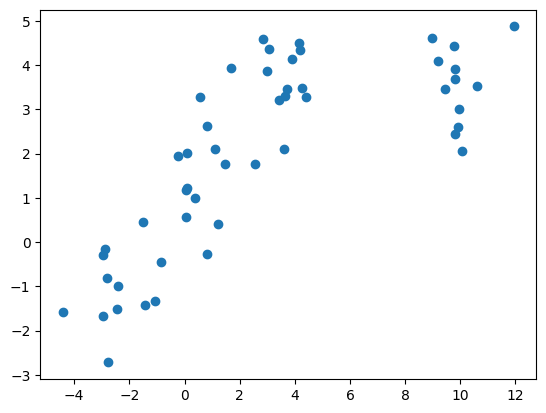

In [ ]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o')

##### Penjelasan *Source Code* :
Digunakan untuk membuat *scatter plot* dari dataset X1 dengan sumbu x dan y menggunakan matplotlib.pyplot, memanfaatkan parameter marker='o' untuk menandai titik-titik data dengan simbol lingkaran, memberikan visualisasi langsung dari distribusi dan pola data dalam dua dimensi.

##### Penjelasan Gambar :
Gambar di atas menampilkan *plot data* acak dalam dua dimensi, di mana nilai-nilainya tidak memiliki hubungan yang jelas. Lingkaran-lingkaran berwarna biru tersebar secara acak tanpa pola atau tren yang terlihat. Sehingga, dapat disimpulkan bahwa data ini tidak memiliki struktur terdefinisi dan sulit untuk dibagi menjadi kelompok-kelompok yang jelas.


In [ ]:
# Inisialisasi objek Agglomerative Clustering
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'single')

# Melatih model pengelompokan pada dataset
agglom.fit(X1,y1)

AgglomerativeClustering(linkage='single', n_clusters=4)

##### Penjelasan *Source Code* :
Digunakan untuk menginisialisasi objek Agglomerative Clustering dengan 4 *cluster* dan metode penggabungan 'single'. Selanjutnya, dilakukan pelatihan model pengelompokan pada dataset X1 dan y1 menggunakan fungsi fit(). Model ini menggunakan algoritma aglomerasi untuk mengelompokkan data ke dalam 4 *cluster* berdasarkan kesamaan atau kedekatan antar-data.

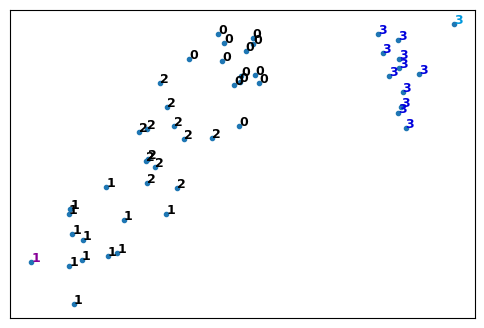

In [ ]:
# Membuat figure dengan ukuran 6, 4
plt.figure(figsize=(6,4))

# Membuat minimum dan maximum range dari X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Mencari rata-rata dari jarak X1.
X1 = (X1 - x_min) / (x_max - x_min)

# Looping untuk mendisplay semua datapoints.
for i in range(X1.shape[0]) :
  plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
    color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
    fontdict={'weight' : 'bold', 'size' : 9})

# Hapus x ticks, y ticks, x dan y axis (garis koordinat)
plt.xticks([])
plt.yticks([])

# Menampilkan plot dari data asli sebelum dicluster
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Menampilkan plot
plt.show()

##### Penjelasan *Source Code* :
*Source code* ini menciptakan sebuah plot untuk memvisualisasikan hasil pengelompokan yang dilakukan oleh model Agglomerative Clustering. Pertama, ukuran figur diatur menjadi 6x4. Selanjutnya, dilakukan normalisasi terhadap data X1 dengan menghitung minimum dan maksimum *range*, dan kemudian mengubah setiap nilai dalam X1 ke rentang [0, 1].

Selanjutnya, dilakukan *looping* untuk menampilkan label *cluster* pada setiap titik data, dengan warna label ditentukan oleh pemetaan ke skala warna tertentu. *Ticks* dan *axis* pada plot dihapus untuk memperjelas visualisasi. Terakhir, plot dari data asli sebelum di-*cluster* ditampilkan dengan simbol titik (marker='.'). Plot ini memberikan representasi visual dari pengelompokan yang dilakukan oleh model Agglomerative Clustering pada *dataset* X1.

In [ ]:
# Menghitung matriks jarak antara dua set data
dist_matrix = distance_matrix(X1,X1)

# Mencetak hasil matriks jarak
print(dist_matrix)

[[0.         0.3960286  0.19388985 ... 0.15834721 0.90568299 0.39569067]
 [0.3960286  0.         0.5786274  ... 0.50594745 1.04590953 0.02189803]
 [0.19388985 0.5786274  0.         ... 0.22274036 0.81550732 0.57512386]
 ...
 [0.15834721 0.50594745 0.22274036 ... 0.         1.02280033 0.51100888]
 [0.90568299 1.04590953 0.81550732 ... 1.02280033 0.         1.0267821 ]
 [0.39569067 0.02189803 0.57512386 ... 0.51100888 1.0267821  0.        ]]


##### Penjelasan *Source Code* :
Digunakan untuk menghitung matriks jarak antara dua set data menggunakan fungsi distance_matrix dari modul scipy.spatial. Pertama, variabel dist_matrix diinisialisasi untuk menampung hasil perhitungan matriks jarak antara set data X1 dan dirinya sendiri. Setelah itu, hasil matriks jarak dicetak ke layar menggunakan fungsi *print*.

Matriks jarak ini memberikan informasi tentang seberapa jauh atau dekat setiap pasang titik data dalam X1. Setiap elemen matriks menunjukkan jarak antara titik pada baris tertentu dengan titik pada kolom tertentu.

In [ ]:
# Memberikan parameter pada kelas linkage dari hierarki
X = hierarchy.linkage(dist_matrix, 'single')
Y = hierarchy.linkage(dist_matrix, 'average')

<ipython-input-96-c1e7a0c0e662>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  X = hierarchy.linkage(dist_matrix, 'single')
<ipython-input-96-c1e7a0c0e662>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(dist_matrix, 'average')


Text(0.5, 1.0, 'Single Linkage')

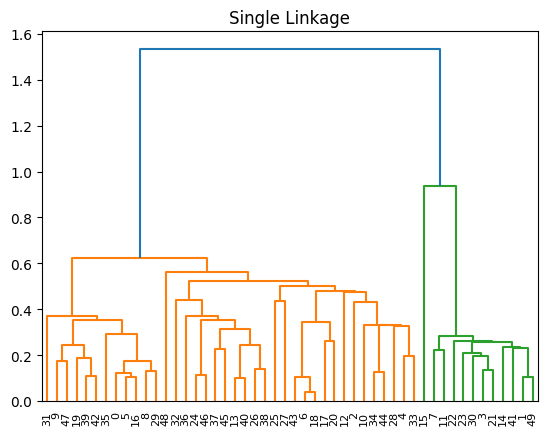

In [ ]:
# Single Linkage
dendroX = hierarchy.dendrogram(X)
plt.title("Single Linkage")

Text(0.5, 1.0, 'Average Linkage')

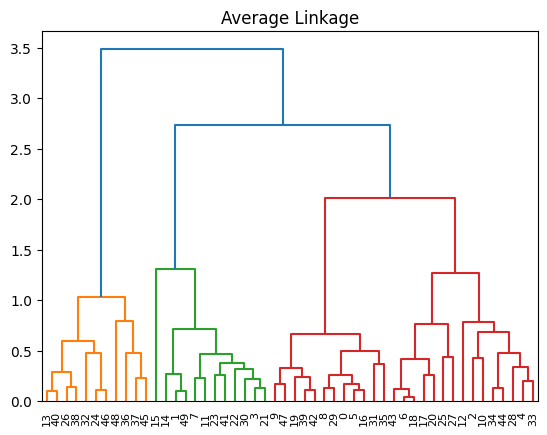

In [ ]:
# Average Linkage
dendroY = hierarchy.dendrogram(Y)
plt.title("Average Linkage")

##### Penjelasan Kedua Gambar :
Perbedaan antara *Single Linkage* dan *Average Linkage* dalam konteks analisis *Agglomerative Clustering* terletak pada cara pengukuran jarak antara dua *cluster* yang akan digabungkan.

Dalam *Single Linkage*, jarak antara dua *cluster* diukur berdasarkan jarak terdekat antara satu anggota dari *cluster* pertama dengan satu anggota dari *cluster* kedua. Oleh karena itu, *cluster* yang memiliki dua anggota dengan jarak terdekat paling kecil akan digabungkan. Pendekatan ini cenderung membentuk *cluster* yang panjang dan berjajar, karena hanya mempertimbangkan jarak terdekat antara anggota *cluster*.

Sementara itu, *Average Linkage* mengukur jarak antara dua *cluster* berdasarkan rata-rata dari semua pasangan jarak antara anggota *cluster* pertama dan *cluster* kedua. Pendekatan ini lebih mempertimbangkan keseluruhan distribusi anggota *cluster*, sehingga dapat menghasilkan *cluster* yang lebih kompak dan merata. *Average Linkage* cenderung menghasilkan *cluster* dengan bentuk yang lebih seimbang.

###Soal 2 - Lakukan *Agglomerative Clustering* menggunakan scipy dan scikit-learn dengan *Single Linkage* dan *Average Linkage* untuk *dataset* cars_clustering! Jelaskan perbedaannya!

In [ ]:
# Membaca dataset dengan library panda
pdf = pd.read_csv("/content/drive/MyDrive/cars_clus.csv")

In [ ]:
print ("Shape of dataset: ", pdf.shape)
pdf.head(5)

Shape of dataset:  (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.36,0,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2.828,0
1,Acura,TL,39.384,19.875,0,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,3.673,0
2,Acura,CL,14.114,18.225,0,$null$,3.2,225,106.9,70.6,192,3.47,17.2,26,2.647,0
3,Acura,RL,8.588,29.725,0,42,3.5,210,114.6,71.4,196.6,3.85,18,22,2.15,0
4,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,3.015,0


In [ ]:
# Mencetak dimensi dataset sebelum proses pembersihan
print("Dimensi dataset sebelum cleaning:", pdf.size)

# Mengubah kolom tertentu menjadi tipe data numerik, dan mengatasi nilai non-numerik dengan menggantinya menjadi NaN
pdf[['sales', 'resale', 'type','price','engine_s','horsepow','wheelbas','width',
      'length','curb_wgt','fuel_cap','mpg', 'lnsales']] = pdf[['sales', 'resale',
      'type','price','engine_s','horsepow','wheelbas','width','length','curb_wgt',
      'fuel_cap','mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')

# Menghapus baris yang mengandung nilai NaN
pdf = pdf.dropna()
# Mengatur ulang indeks setelah penghapusan baris
pdf = pdf.reset_index(drop=True)
# Mencetak dimensi dataset setelah proses pembersihan
print("Ukuran pdf setelah cleaning:", pdf.size)
# Menampilkan 5 baris pertama dari dataset yang telah dibersihkan
pdf.head(5)

Dimensi dataset sebelum cleaning: 2544
Ukuran pdf setelah cleaning: 1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0


##### Penjelasan *Source Code* :
Digunakan untuk membersihkan *dataset* yang disimpan dalam suatu *DataFrame* menggunakan modul pandas. Pertama, dimensi *dataset* sebelum proses pembersihan dicetak menggunakan print("Dimensi dataset sebelum cleaning:", pdf.size).

Selanjutnya, beberapa kolom tertentu dalam *dataset*, seperti 'sales', 'resale', dan lainnya, diubah menjadi tipe data numerik dengan menggunakan pd.to_numeric dan nilai non-numerik diatasi dengan menggantinya menjadi NaN (Not a Number). Ini membantu dalam memastikan bahwa data numerik dapat diolah secara konsisten.

Langkah berikutnya adalah menghapus baris yang mengandung nilai NaN dengan menggunakan pdf.dropna(), dan setelah itu, indeks *dataset* diatur ulang menggunakan pdf.reset_index(drop=True).

Selanjutnya, dimensi *dataset* setelah proses pembersihan dicetak menggunakan print("Ukuran pdf setelah cleaning:", pdf.size). Terakhir, lima baris pertama dari *dataset* yang telah dibersihkan ditampilkan dengan menggunakan pdf.head(5).

In [ ]:
# Feature Selection
featureset = pdf[['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]
featureset.head()

,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
2,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
3,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0
4,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0


##### Penjelasan *Source Code* :
Digunakan untuk melakukan seleksi fitur atau membuat *subset* dari *dataset* yang telah dibersihkan di mana kita hanya memilih kolom-kolom tertentu sebagai fitur. Fitur-fitur tersebut, seperti 'engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', dan 'mpg' untuk kemudian disimpan dalam variabel "featureset".

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# x berisikan nilai dari featureset yang nantinya akan digunakan untuk normalisasi
x = featureset.values

# Membuat objek MinMaxScaler
min_max_scaler = MinMaxScaler()

# Menggunakan fit_transform untuk mengubah nilai variabel dalam rentang 0 hingga 1
feature_mtx = min_max_scaler.fit_transform(x)

# Menampilkan lima baris pertama dari hasil normalisasi
feature_mtx[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

##### Penjelasan *Source Code* :
Dalam *source code* tersebut, modul MinMaxScaler dari scikit-learn digunakan untuk melakukan normalisasi pada *dataset* fitur yang disimpan dalam variabel "featureset". Langkah pertama melibatkan penyimpanan nilai fitur ke dalam variabel x. Selanjutnya, objek MinMaxScaler dibuat sebagai representasi *normalizer* dan metode fit_transform digunakan untuk mengubah nilai variabel dalam rentang 0 hingga 1. Hasil normalisasi kemudian disimpan dalam variabel "feature_mtx".

Dengan normalisasi ini, nilai-nilai fitur dalam *dataset* diubah sedemikian rupa sehingga semua fitur memiliki skala yang seragam, yaitu antara 0 dan 1. Hal ini umumnya dilakukan untuk menghindari dominasi fitur tertentu dalam proses pemodelan. Setelah normalisasi, lima baris pertama dari hasil tersebut ditampilkan menggunakan feature_mtx[0:5], memberikan gambaran awal tentang data yang telah dinormalisasi.

###Soal 2A - Menggunakan Scipy

In [ ]:
# Clustering with Scipy
import scipy
import pylab
import scipy.cluster.hierarchy

# Mendapatkan jumlah baris (leng) dalam feature_mtx
leng = feature_mtx.shape[0]
# Inisialisasi matriks jarak D dengan nol
D = scipy.zeros([leng,leng])

# Menghitung jarak euclidean antara setiap pasangan data dalam feature_mtx
for i in range(leng):
  for j in range(leng):
    D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

<ipython-input-104-fb67c369474a>:9: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng,leng])


##### Penjelasan *Source Code* :
Dalam *source code* tersebut, dilakukan *clustering* menggunakan modul Scipy dilakukan untuk mengelompokkan data berdasarkan jarak Euclidean antara pasangan data dalam feature_mtx. Pertama, modul scipy.cluster.hierarchy di-*import*, dan matriks jarak D diinisialisasi sebagai matriks nol dengan ukuran sesuai dengan jumlah baris dalam feature_mtx.

Selanjutnya, dilakukan perhitungan jarak Euclidean antara setiap pasangan data dalam feature_mtx menggunakan *nested loo*p. Nilai jarak dihitung dengan memanfaatkan fungsi scipy.spatial.distance.euclidean untuk mengukur jarak antara dua vektor fitur. Hasil perhitungan jarak ini kemudian disimpan dalam matriks D.

In [ ]:
X = hierarchy.linkage(D, 'single')
Y = hierarchy.linkage(D, 'average')

<ipython-input-105-79769beb0d6c>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  X = hierarchy.linkage(D, 'single')
<ipython-input-105-79769beb0d6c>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(D, 'average')


In [ ]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Single Linkage")
# Menentukan batas jarak maksimum (max_d) untuk membentuk cluster
max_d = 3
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(X, max_d, criterion='distance')
clusters

Single Linkage


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Average Linkage")
# Menentukan batas jarak maksimum (max_d) untuk membentuk cluster
max_d = 3
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(Y, max_d, criterion='distance')
clusters

Average Linkage


array([3, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 4, 3,
       6, 5, 5, 5, 5, 5, 3, 5, 5, 2, 1, 1, 1, 4, 5, 3, 5, 5, 5, 4, 5, 4,
       1, 5, 1, 3, 5, 5, 5, 4, 3, 3, 5, 5, 3, 5, 5, 5, 5, 4, 4, 4, 3, 5,
       5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 3, 5, 5, 5, 5, 5, 4,
       5, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 5, 5, 3, 5, 3,
       5, 1, 3, 5, 5, 3, 3], dtype=int32)

##### Penjelasan *Source Code* :
Digunakan untuk menentukan berapa banyak *cluster* data yang ada, dengan menggunakan modul hierarchy dari Scipy. Pertama, kita akan mencetak informasi tentang cara data dihubungkan, yang disebut 'Single Linkage' dan 'Average Linkage'

Selanjutnya, kita menetapkan batas jarak tertentu (dalam contoh ini, 3) sebagai patokan untuk membentuk *cluster* data. Dengan menggunakan fungsi fcluster, kita dapat menentukan *cluster-cluster* berdasarkan patokan jarak tersebut. Hasilnya, yang disimpan dalam variabel "clusters", memberikan informasi tentang keanggotaan setiap data ke dalam *cluster* yang terbentuk.


In [ ]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Single Linkage")
# Menentukan jumlah klaster yang diinginkan (k)
k = 5
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(X, k, criterion = 'maxclust')
clusters

Single Linkage


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       5, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2], dtype=int32)

In [ ]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Average Linkage")
# Menentukan jumlah klaster yang diinginkan (k)
k = 5
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(Y, k, criterion = 'maxclust')
clusters

Average Linkage


array([2, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 3, 2,
       5, 4, 4, 4, 4, 4, 2, 4, 4, 1, 1, 1, 1, 3, 4, 2, 4, 4, 4, 3, 4, 3,
       1, 4, 1, 2, 4, 4, 4, 3, 2, 2, 4, 4, 2, 4, 4, 4, 4, 3, 3, 3, 2, 4,
       4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 3, 2, 4, 4, 4, 4, 4, 3,
       4, 3, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2,
       4, 1, 2, 4, 4, 2, 2], dtype=int32)

##### Penjelasan *Source Code* :
Digunakan untuk menentukan jumlah *cluster* data dengan menggunakan modul hierarchy dari Scipy. Pertama, informasi tentang metode *linkage* yang digunakan ('Single Linkage' dan 'Average Linkage').

Selanjutnya jumlah *cluster* yang diinginkan, dalam contoh ini disetel ke 5, ditentukan. Dengan menggunakan fungsi fcluster dan kriteria 'maxclust', *cluster-cluster* ditentukan berdasarkan jumlah *cluster* yang diinginkan. Hasilnya, yang disimpan dalam variabel "clusters", memberikan informasi tentang keanggotaan setiap data ke dalam *cluster* yang terbentuk dengan jumlah yang telah ditentukan sebelumnya.


Text(0.5, 1.0, 'Single Linkage')

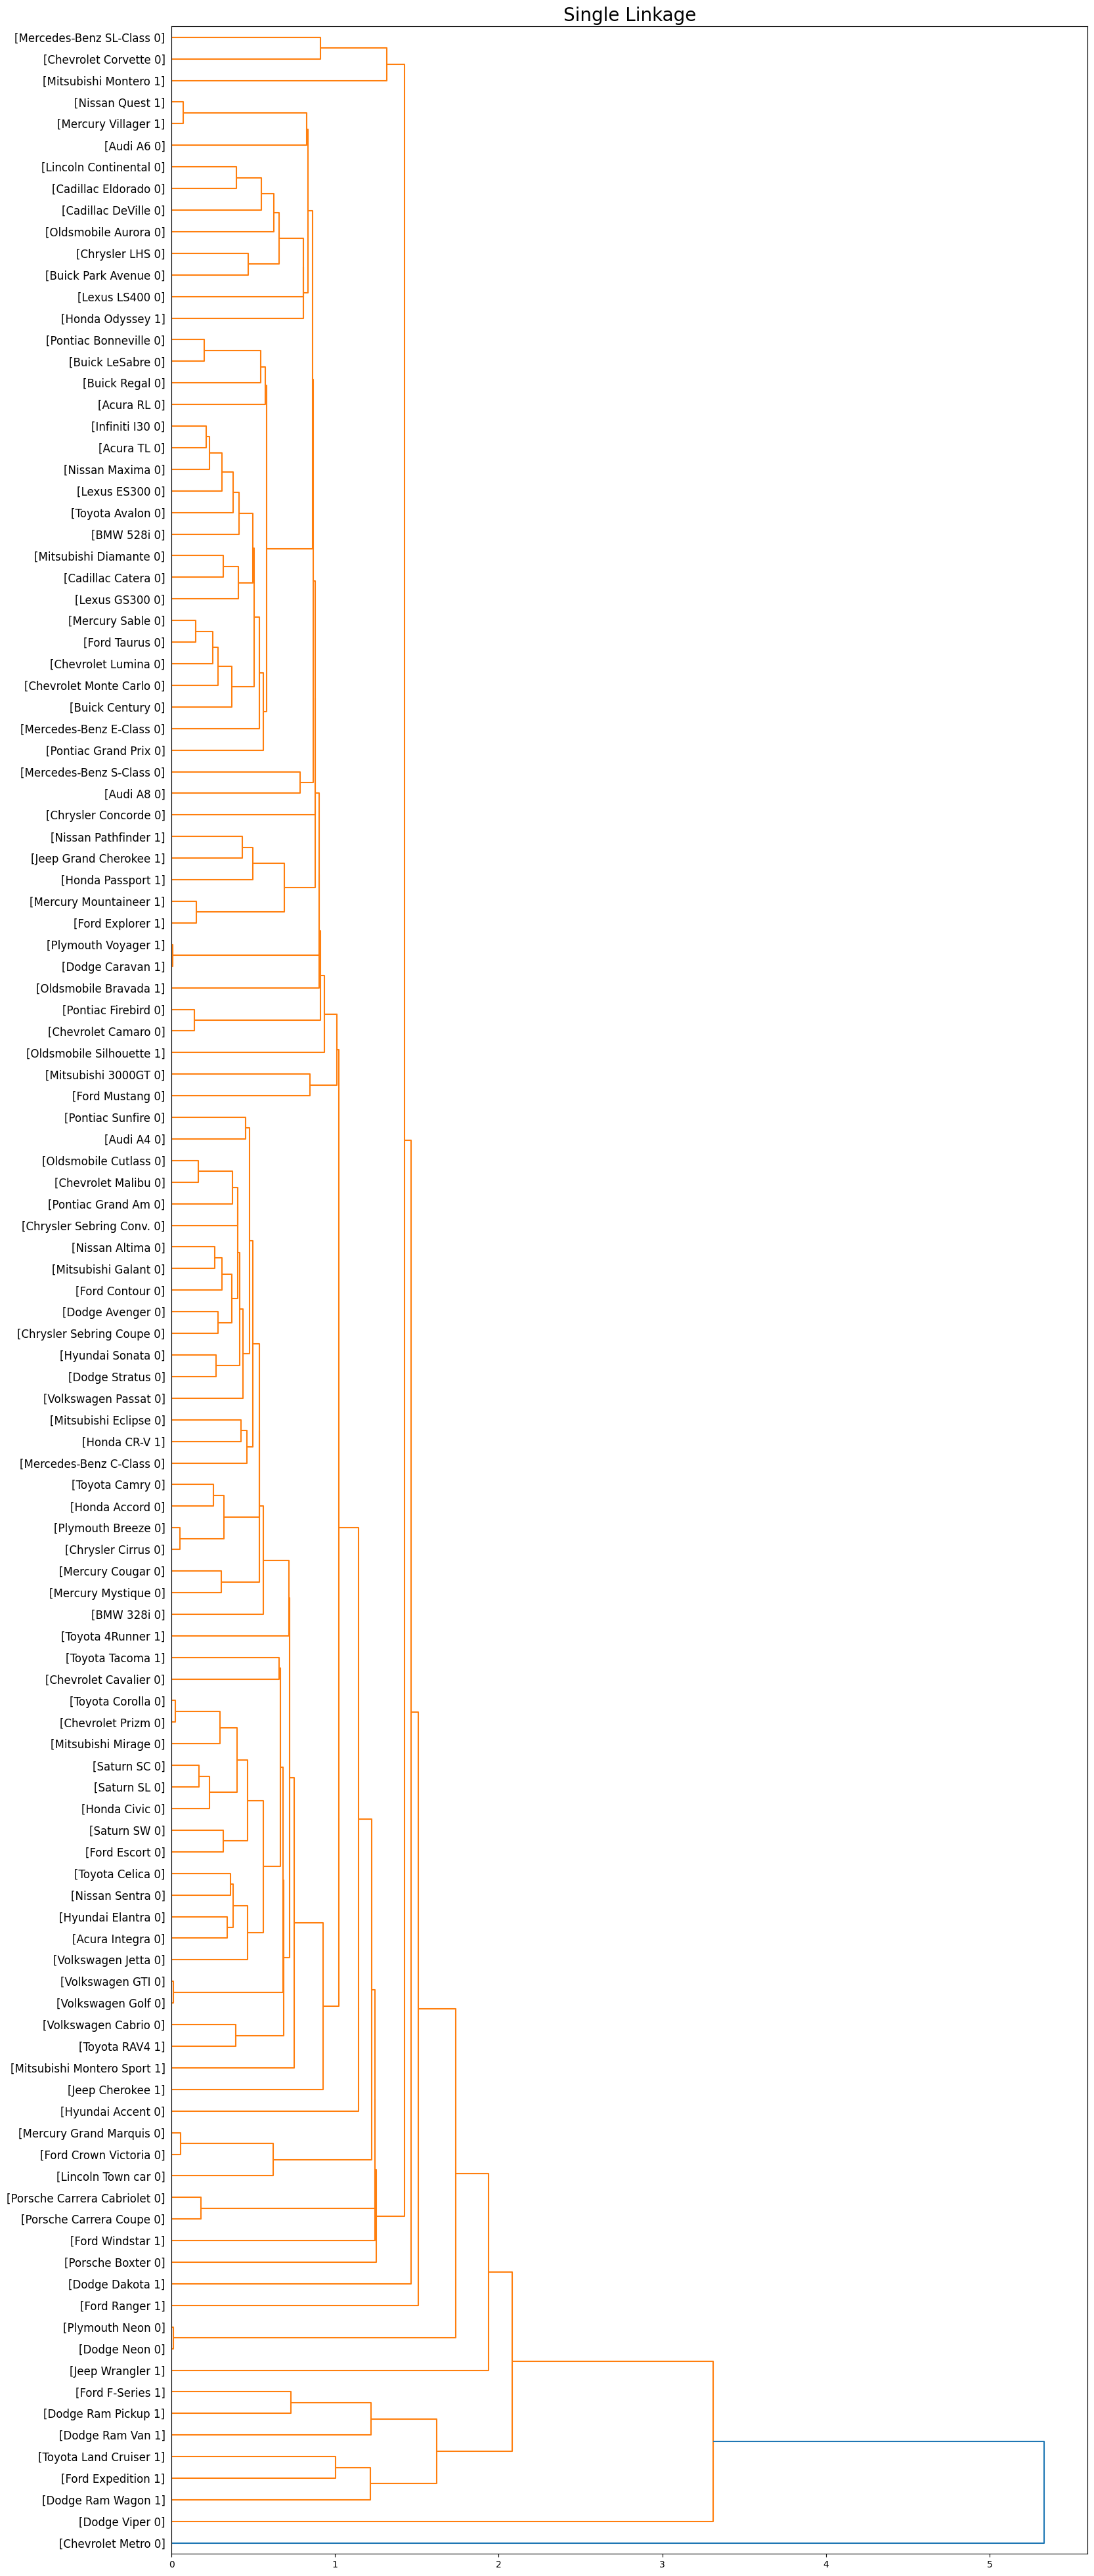

In [ ]:
# Menentukan ukuran figure yang akan dibuat
fig = pylab.figure(figsize=(18,50))

# Fungsi untuk memberikan label pada leaf (daun) dendrogram
def llf(id):
  return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id],
                         int(float(pdf['type'][id])))

# Membuat dendrogram
dendro = hierarchy.dendrogram(X, leaf_label_func = llf,
                              leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

# Menambahkan judul pada dendrogram
plt.title('Single Linkage', fontsize=20)

##### Penjelasan *Source Code* :
Digunakan untuk membuat sebuah *figure* dengan ukuran yang telah ditentukan (18x50) menggunakan modul pylab.figure. Fungsi llf digunakan untuk memberikan label pada *leaf* (daun) dendrogram berdasarkan kolom-kolom tertentu dari DataFrame pdf.

Selanjutnya, dendrogram dibuat dengan memanggil fungsi hierarchy.dendrogram. Label pada *leaf* diatur menggunakan fungsi llf, dan beberapa parameter seperti leaf_rotation, leaf_font_size, dan orientation digunakan untuk penataan visual. Dalam hal ini, orientasi dendrogram diatur ke kanan.

Terakhir, sebuah judul ('Single Linkage') ditambahkan pada dendrogram menggunakan plt.title. Judul ini memberikan informasi tentang metode *linkage* yang digunakan dalam pembentukan dendrogram.

Text(0.5, 1.0, 'Average Linkage')

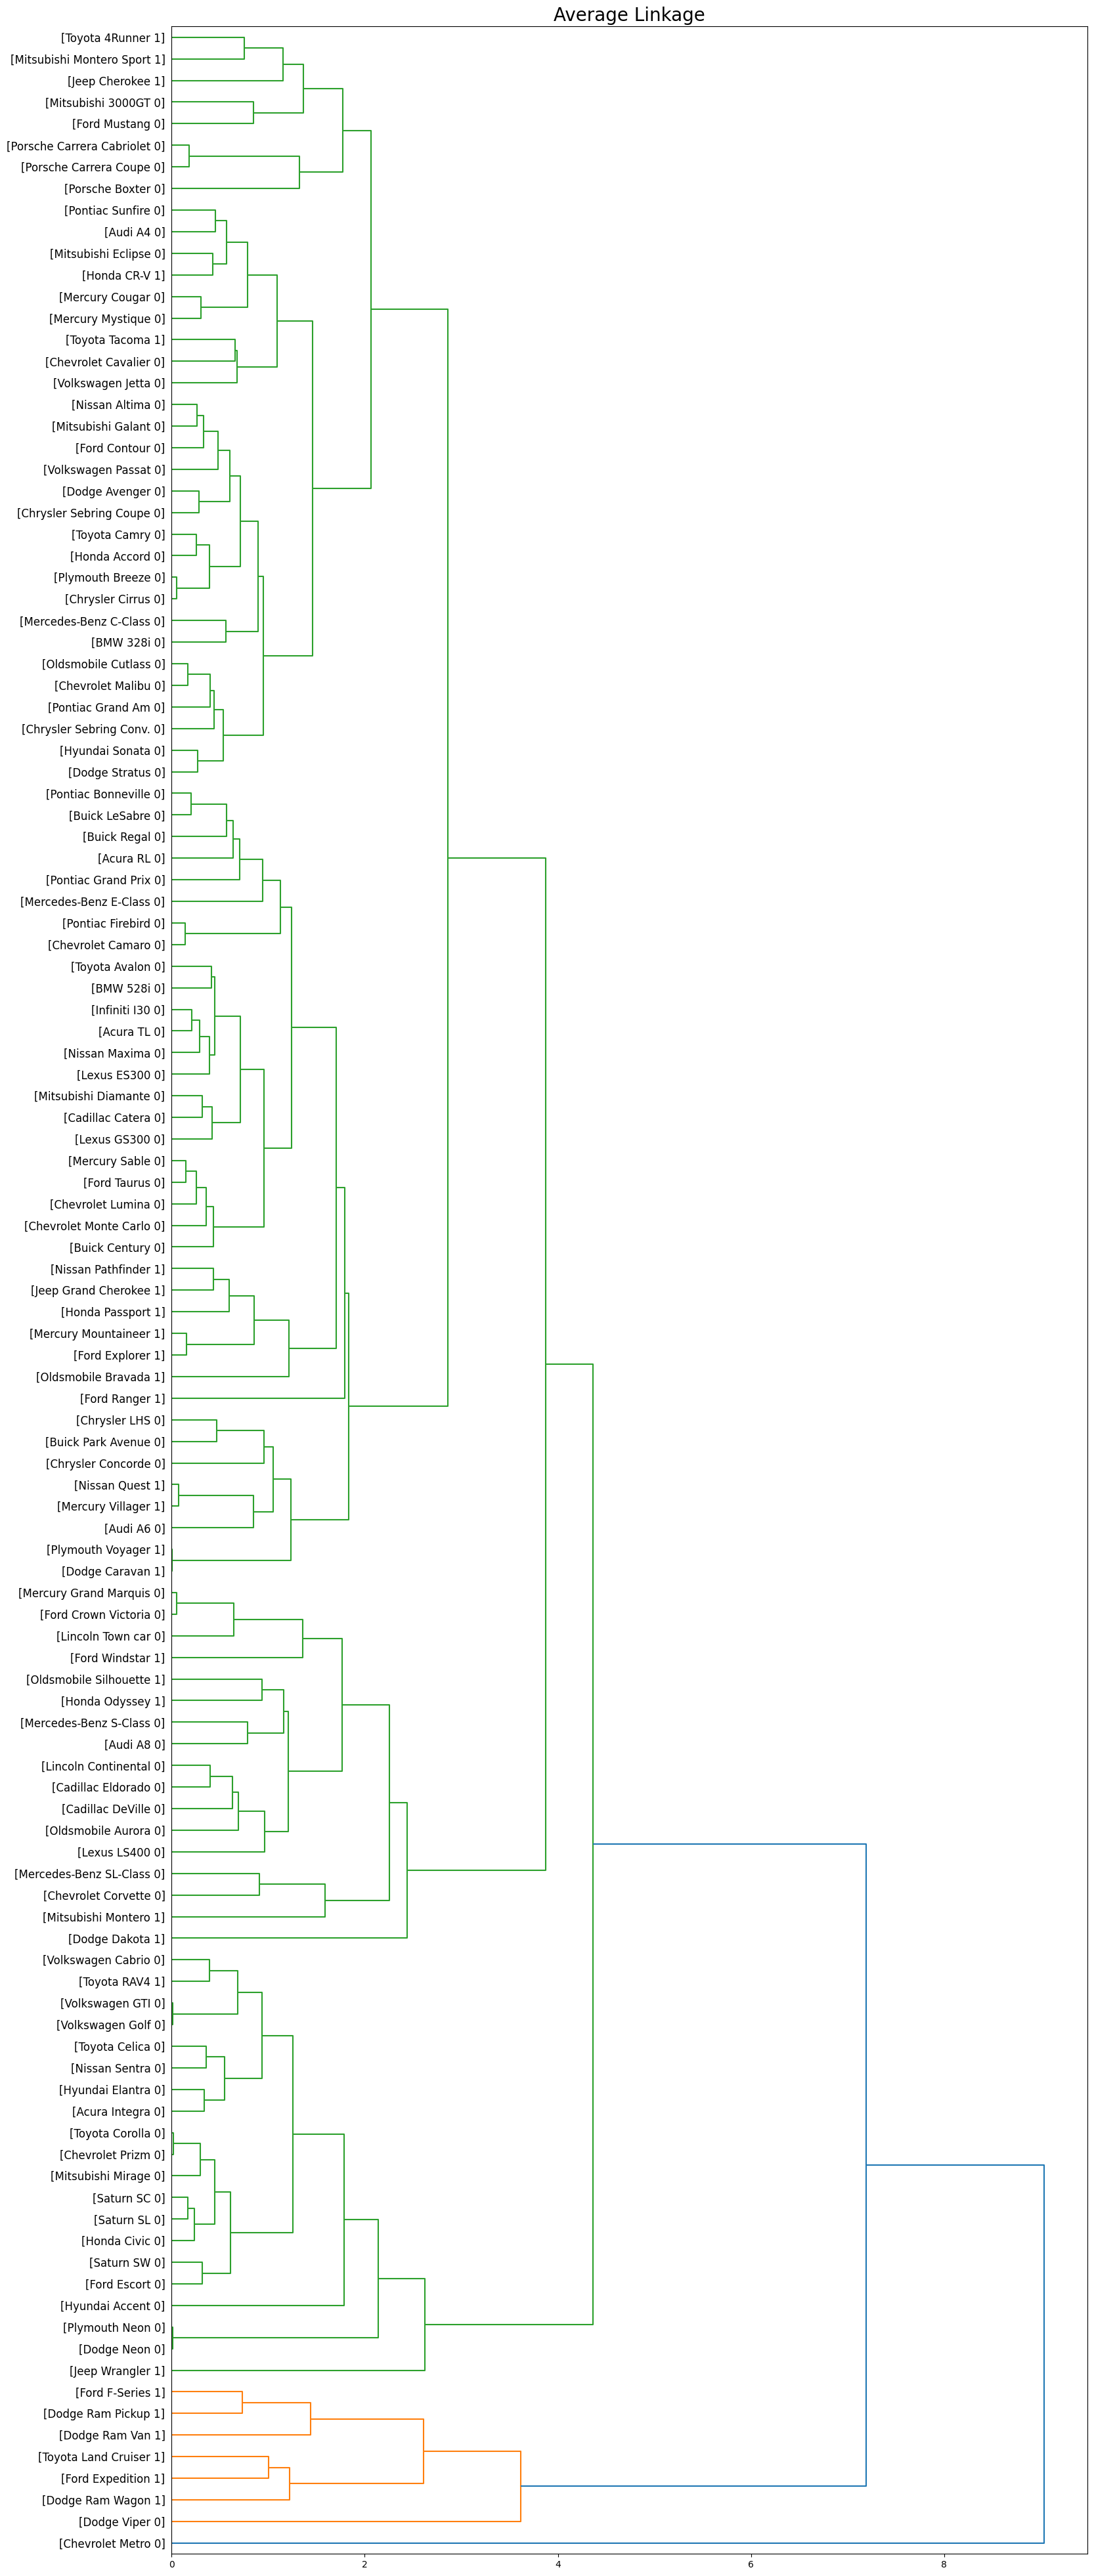

In [ ]:
# Menentukan ukuran figure yang akan dibuat
fig = pylab.figure(figsize=(18,50))

# Fungsi untuk memberikan label pada leaf (daun) dendrogram
def llf(id):
  return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id],
                         int(float(pdf['type'][id])))

# Membuat dendrogram
dendro = hierarchy.dendrogram(Y, leaf_label_func = llf,
                              leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

# Menambahkan judul pada dendrogram
plt.title('Average Linkage', fontsize=20)

##### Penjelasan *Source Code* :
Digunakan untuk membuat sebuah *figure* dengan ukuran yang telah ditentukan (18x50) menggunakan modul pylab.figure. Fungsi llf digunakan untuk memberikan label pada *leaf* (daun) dendrogram berdasarkan kolom-kolom tertentu dari DataFrame pdf.

Selanjutnya, dendrogram dibuat dengan memanggil fungsi hierarchy.dendrogram. Label pada *leaf* diatur menggunakan fungsi llf, dan beberapa parameter seperti leaf_rotation, leaf_font_size, dan orientation digunakan untuk penataan visual. Dalam hal ini, orientasi dendrogram diatur ke kanan.

Terakhir, sebuah judul ('Average Linkage') ditambahkan pada dendrogram menggunakan plt.title. Judul ini memberikan informasi tentang metode *linkage* yang digunakan dalam pembentukan dendrogram.

###Soal 2B - Menggunakan Scikit-learn

In [ ]:
# Mencari jarak matrix
dist_matrix = distance_matrix(feature_mtx, feature_mtx)

# Mencetak matriks jarak yang dihasilkan
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


##### Penjelasan *Source Code* :
Digunakan untuk mengukur jarak antara setiap pasangan data dalam matriks fitur menggunakan fungsi distance_matrix dari modul scikit-learn. Dengan menyediakan matriks fitur (feature_mtx) sebagai *input*, kode di atas menghitung dan menyimpan matriks jarak yang mencerminkan jarak Euclidean antara setiap pasangan data dalam *dataset*.

In [ ]:
# Membuat objek dari kelas AgglomerativeClustering
agglomsingle = AgglomerativeClustering(n_clusters = 6, linkage = 'single').fit(feature_mtx)

# Melakukan clustering
agglomsingle.fit(feature_mtx)
agglomsingle.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0])

##### Penjelasan *Source Code* :
Digunakan untuk membentuk objek kelas AgglomerativeClustering dengan metode *Single Linkage* dan menentukan jumlah *cluster* sebanyak 6 pada matriks fitur (feature_mtx). Setelahnya, objek tersebut dilatih untuk melakukan *clustering* pada data melalui metode fit, dan label-label *cluster* yang diberikan oleh model dapat diakses melalui atribut labels_ pada objek "agglomsingle". Langkah-langkah ini memberikan informasi tentang keanggotaan setiap data dalam *cluster* yang terbentuk berdasarkan metode *Single Linkage*.

In [ ]:
# Membuat objek dari kelas AgglomerativeClustering
agglomaverage = AgglomerativeClustering(n_clusters = 6, linkage = 'average').fit(feature_mtx)

# Melakukan clustering
agglomaverage.fit(feature_mtx)
agglomaverage.labels_

array([0, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 1, 0,
       3, 0, 0, 4, 0, 4, 0, 0, 0, 1, 5, 2, 2, 4, 4, 0, 4, 0, 4, 4, 4, 4,
       2, 4, 5, 0, 0, 0, 4, 4, 0, 0, 0, 4, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0,
       0, 4, 0, 4, 0, 0, 0, 4, 4, 4, 4, 0, 4, 4, 1, 0, 0, 4, 4, 4, 0, 4,
       4, 4, 0, 0, 4, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0])

##### Penjelasan *Source Code* :
Digunakan untuk membentuk objek kelas AgglomerativeClustering dengan metode *Average Linkage* dan menentukan jumlah *cluster* sebanyak 6 pada matriks fitur (feature_mtx). Setelahnya, objek tersebut dilatih untuk melakukan *clustering* pada data melalui metode fit, dan label-label *cluster* yang diberikan oleh model dapat diakses melalui atribut labels_ pada objek "agglomsingle". Langkah-langkah ini memberikan informasi tentang keanggotaan setiap data dalam *cluster* yang terbentuk berdasarkan metode *Average Linkage*.

In [ ]:
single = pdf.copy(deep=True)
average = pdf.copy(deep=True)

In [ ]:
# Menambahkan kolom baru bernama 'cluster_' ke dalam DataFrame single
single['cluster_'] = agglomsingle.labels_

# Menampilkan lima baris pertama
single.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0,0


In [ ]:
# Menambahkan kolom baru bernama 'cluster_' ke dalam DataFrame average
average['cluster_'] = agglomaverage.labels_

# Menampilkan lima baris pertama
average.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0,4
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0,4
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0,4


<ipython-input-118-abb932a90858>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)


Text(0, 0.5, 'mpg')

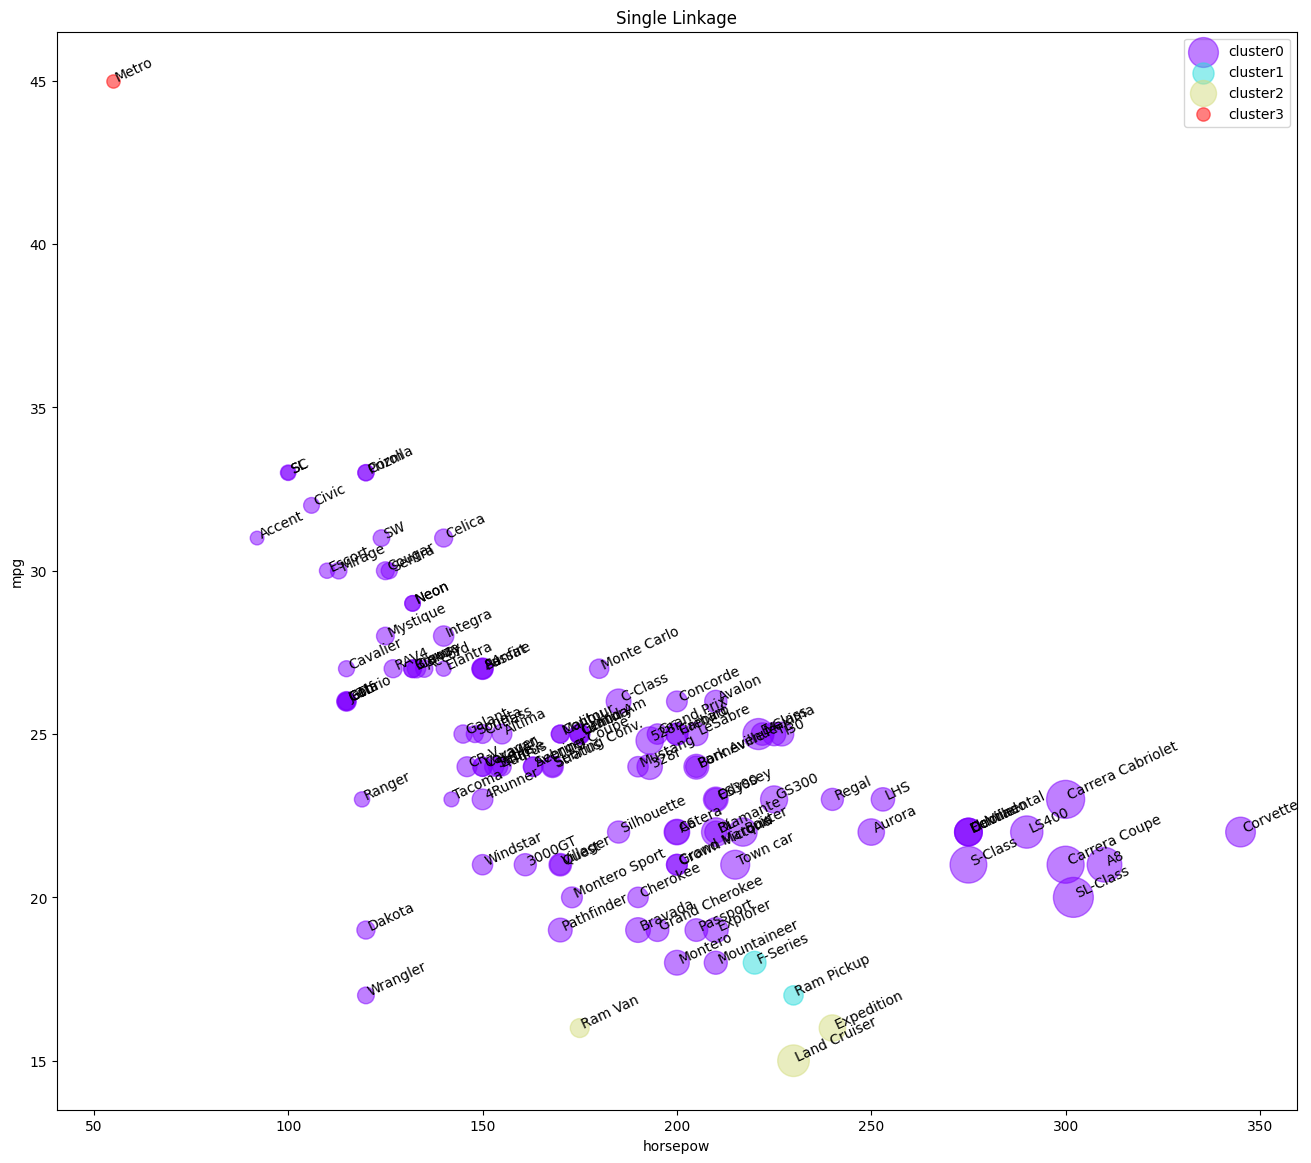

In [ ]:
# Mengimpor modul colormap dari pustaka Matplotlib
import matplotlib.cm as cm

# Inisialisasi Warna dan Label Klaster
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
# Membuat daftar label klaster.
cluster_labels = list(range(0, n_clusters))

# Membuat gambar dengan ukuran 6x4 inch
plt.figure(figsize=(16,14))

# Visualisasi Setiap Klaster
for color, label in zip(colors, cluster_labels):
  subset = single[single.cluster_ == label]
  for i in subset.index:
          plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25)
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)

# Penyusunan Legenda dan Label Grafik
plt.legend()
plt.title('Single Linkage')
plt.xlabel('horsepow')
plt.ylabel('mpg')

<ipython-input-119-d19f2a40a93b>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)


Text(0, 0.5, 'mpg')

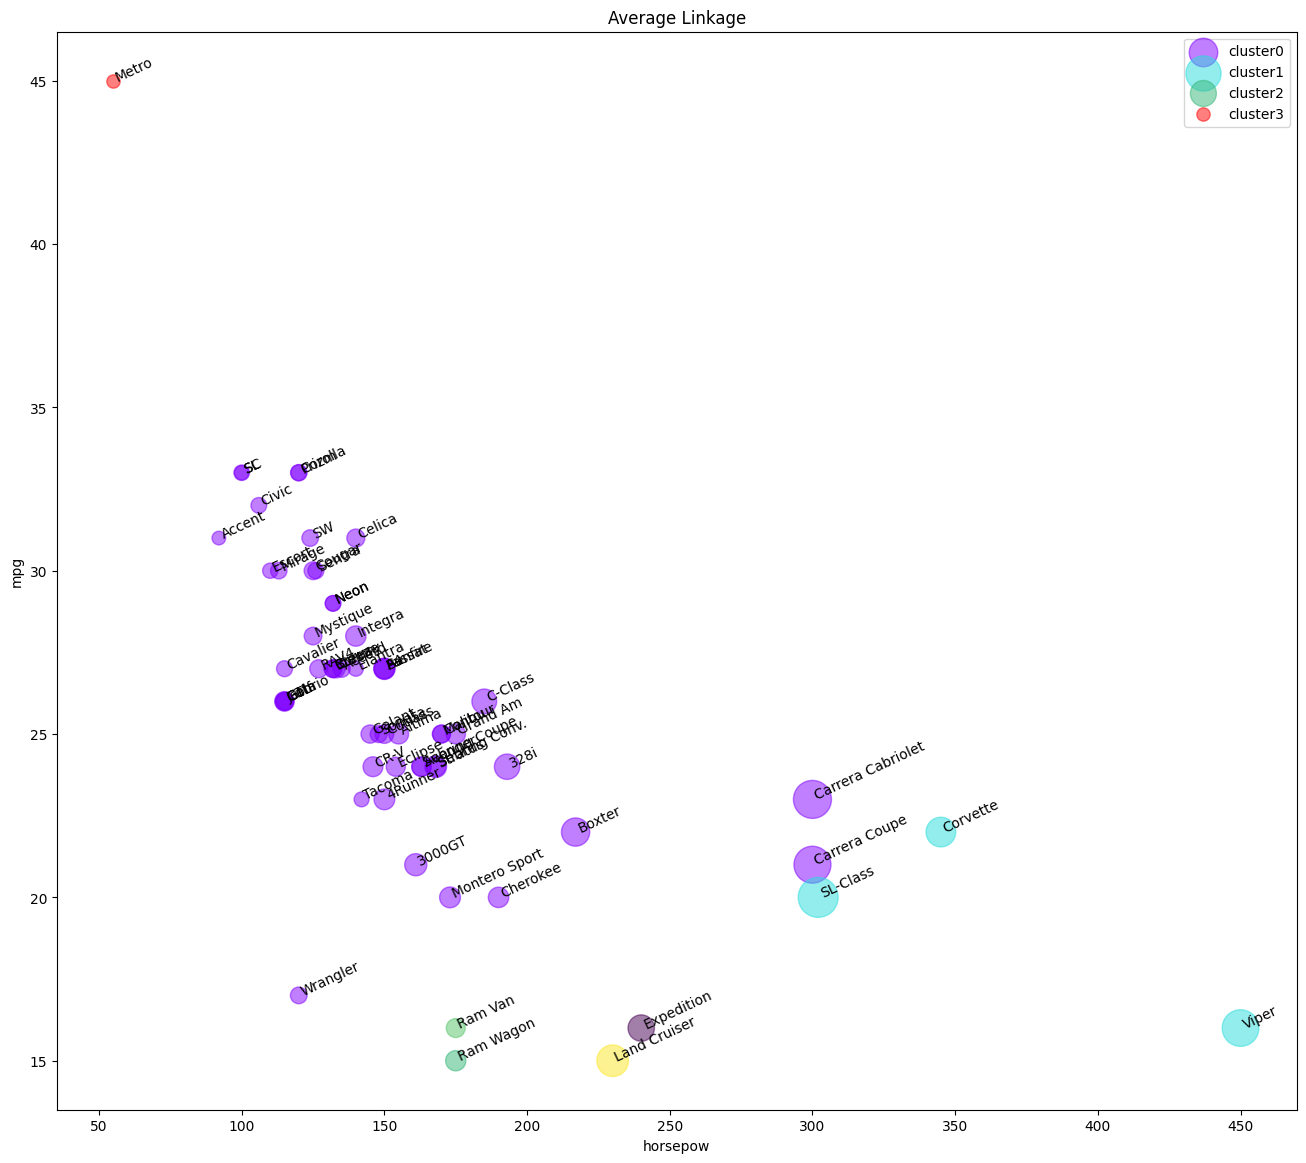

In [ ]:
# Mengimpor modul colormap dari pustaka Matplotlib
import matplotlib.cm as cm

# Inisialisasi Warna dan Label Klaster
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
# Membuat daftar label klaster.
cluster_labels = list(range(0, n_clusters))

# Membuat gambar dengan ukuran 6x4 inch
plt.figure(figsize=(16,14))

# Visualisasi Setiap Klaster
for color, label in zip(colors, cluster_labels):
  subset = average[average.cluster_ == label]
  for i in subset.index:
          plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25)
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)

# Penyusunan Legenda dan Label Grafik
plt.legend()
plt.title('Average Linkage')
plt.xlabel('horsepow')
plt.ylabel('mpg')

In [ ]:
# Menghitung tipe di setiap cluster
single.groupby(['cluster_', 'type'])['cluster_'].count()

cluster_  type
0         0.0     86
          1.0     23
1         1.0      2
2         1.0      3
3         0.0      1
4         1.0      1
5         0.0      1
Name: cluster_, dtype: int64

In [ ]:
# Menghitung tipe di setiap cluster
average.groupby(['cluster_', 'type'])['cluster_'].count()

cluster_  type
0         0.0     47
          1.0      7
1         0.0      3
2         1.0      4
3         0.0      1
4         0.0     37
          1.0     16
5         1.0      2
Name: cluster_, dtype: int64

In [ ]:
# Karakteristik masing-masing cluster
single_cars = single.groupby(['cluster_', 'type'])['horsepow', 'engine_s', 'mpg', 'price'].mean()
single_cars

<ipython-input-122-a9d35435ddb7>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  single_cars = single.groupby(['cluster_', 'type'])['horsepow', 'engine_s', 'mpg', 'price'].mean()


horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   181.197674  2.902326  25.358140  26.286779
         1.0   167.478261  3.095652  21.000000  22.811261
1        1.0   225.000000  4.900000  17.500000  23.197500
2        1.0   215.000000  4.400000  15.666667  35.479333
3        0.0    55.000000  1.000000  45.000000   9.235000
4        1.0   175.000000  3.900000  15.000000  21.315000
5        0.0   450.000000  8.000000  16.000000  69.725000

In [ ]:
# Karakteristik masing-masing cluster
average_cars = average.groupby(['cluster_', 'type'])['horsepow', 'engine_s', 'mpg', 'price'].mean()
average_cars

<ipython-input-123-01263af831a3>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_cars = average.groupby(['cluster_', 'type'])['horsepow', 'engine_s', 'mpg', 'price'].mean()


horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   146.531915  2.246809  27.021277  20.306128
         1.0   149.714286  2.657143  22.000000  18.551571
1        0.0   365.666667  6.233333  19.333333  66.010000
2        1.0   205.000000  4.275000  15.500000  31.938250
3        0.0    55.000000  1.000000  45.000000   9.235000
4        0.0   217.540541  3.602703  23.481081  31.837027
         1.0   175.250000  3.287500  20.562500  24.674875
5        1.0   225.000000  4.900000  17.500000  23.197500

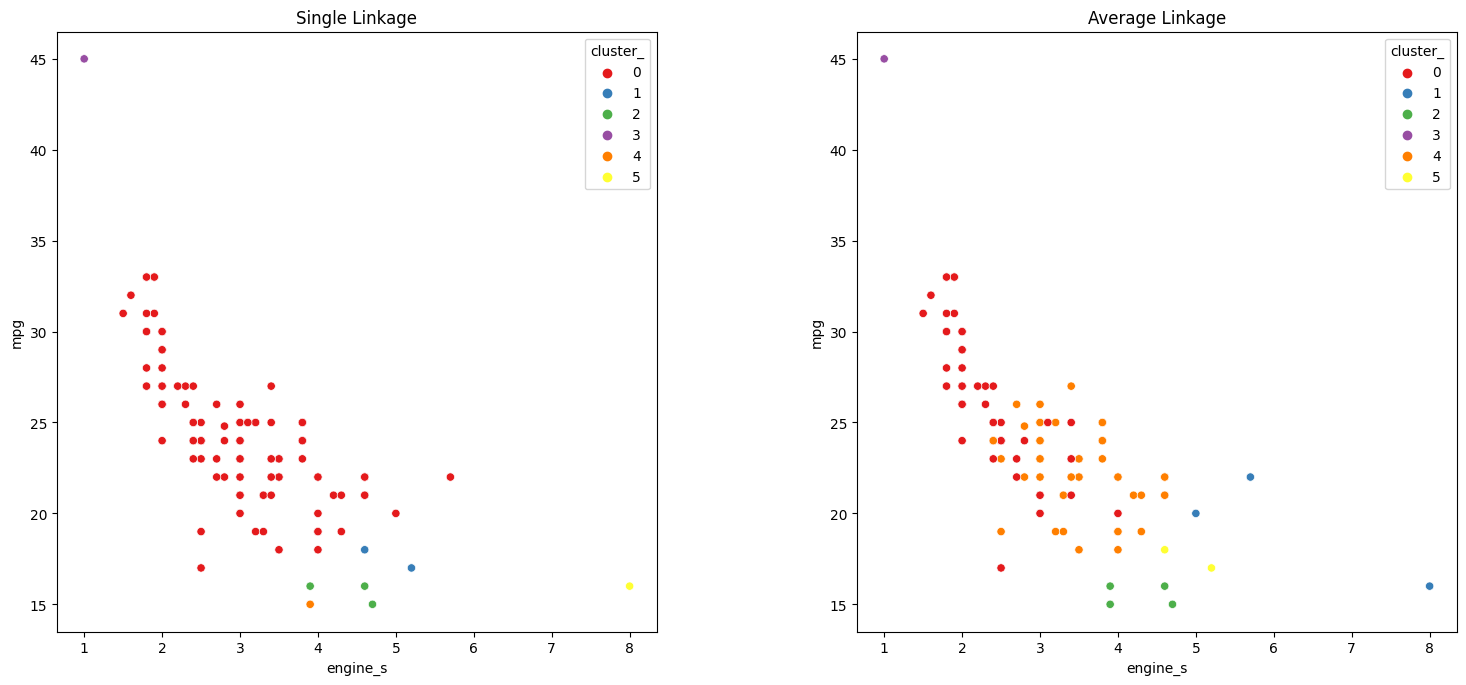

In [ ]:
import seaborn as sns

# Membuat objek gambar (figure) dengan ukuran 16x10.
fig = plt.figure(figsize=(20,10))

# Single Linkage Dendogram
ax2 = fig.add_axes([0.5,0.1,0.3,0.6])
sns.scatterplot(x='engine_s',y='mpg',hue='cluster_',data=single,palette='Set1')
ax2.set_title('Single Linkage')

# Average Linkage Dendogram
ax3 = fig.add_axes([0.9,0.1,0.3,0.6])
sns.scatterplot(x='engine_s',y='mpg',hue='cluster_',data=average,palette='Set1')
ax3.set_title('Average Linkage')

plt.show()

##### Penjelasan Gambar :
Menggunakan Scipy maupun Scikit-learn, hasil dari proses *clustering* cenderung serupa, meskipun terdapat perbedaan dalam langkah-langkah yang diperlukan. Scikit-learn memerlukan lebih banyak langkah, termasuk perhitungan jarak dan karakteristik *cluster* untuk mendapatkan visualisasi akhir yang lebih rinci.

Sifat *cluster* yang dihasilkan, baik melalui *Single* maupun *Average Linkage*, menunjukkan variasi dalam jumlah data di setiap *cluster*. Pada *Single Linkage*, sebagian besar data tergabung dalam satu *cluster* utama, sementara *cluster* lainnya memiliki jumlah data yang lebih terbatas. Namun, pada *Average Linkage*, data lebih tersebar, di mana data yang sebelumnya tergabung dalam *cluster* utama pada *Single Linkage*, sekarang terbagi di antara beberapa *cluster*. Sebagai hasilnya, persebaran data di setiap *cluster* menjadi lebih merata pada *Average Linkage* dibandingkan dengan *Single Linkage*.


###Soal 3 - Lakukan *Agglomerative Clustering* menggunakan scipy dan scikit-learn dengan *Single Linkage*, *Average Linkage*, dan *Complete Linkage* untuk *dataset* iris! Jelaskan perbedaannya!

In [ ]:
# Membaca dataset
from sklearn.datasets import load_iris
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [ ]:
print ("Shape of dataset: ", df.shape)
df.head(5)

Shape of dataset:  (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# x berisikan nilai dari df yang nantinya akan digunakan untuk normalisasi
x = df.values

# Membuat objek MinMaxScaler
min_max_scaler = MinMaxScaler()

# Menggunakan fit_transform untuk mengubah nilai variabel dalam rentang 0 hingga 1
feature_mtx = min_max_scaler.fit_transform(x)

# Menampilkan lima baris pertama dari hasil normalisasi
feature_mtx[0:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667, 0.        ],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667, 0.        ],
       [0.11111111, 0.5       , 0.05084746, 0.04166667, 0.        ],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667, 0.        ],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667, 0.        ]])

##### Penjelasan *Source Code* :
Dalam *source code* tersebut, modul MinMaxScaler dari scikit-learn digunakan untuk melakukan normalisasi pada *dataset* fitur yang disimpan dalam variabel "df". Langkah pertama melibatkan penyimpanan nilai fitur ke dalam variabel x. Selanjutnya, objek MinMaxScaler dibuat sebagai representasi *normalizer* dan metode fit_transform digunakan untuk mengubah nilai variabel dalam rentang 0 hingga 1. Hasil normalisasi kemudian disimpan dalam variabel "feature_mtx".

Dengan normalisasi ini, nilai-nilai fitur dalam *dataset* diubah sedemikian rupa sehingga semua fitur memiliki skala yang seragam, yaitu antara 0 dan 1. Hal ini umumnya dilakukan untuk menghindari dominasi fitur tertentu dalam proses pemodelan. Setelah normalisasi, lima baris pertama dari hasil tersebut ditampilkan menggunakan feature_mtx[0:5], memberikan gambaran awal tentang data yang telah dinormalisasi.

###Soal 3A - Menggunakan Scipy

In [ ]:
# Clustering with Scipy
import scipy
import pylab
import scipy.cluster.hierarchy

# Mendapatkan jumlah baris (leng) dalam feature_mtx
leng = feature_mtx.shape[0]
# Inisialisasi matriks jarak D dengan nol
D = scipy.zeros([leng,leng])

# Menghitung jarak euclidean antara setiap pasangan data dalam feature_mtx
for i in range(leng):
  for j in range(leng):
    D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i],feature_mtx[j])

<ipython-input-128-bd1f2520e8d1>:9: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng,leng])


##### Penjelasan *Source Code* :
Dalam *source code* tersebut, dilakukan *clustering* menggunakan modul Scipy dilakukan untuk mengelompokkan data berdasarkan jarak Euclidean antara pasangan data dalam feature_mtx. Pertama, modul scipy.cluster.hierarchy di-*import*, dan matriks jarak D diinisialisasi sebagai matriks nol dengan ukuran sesuai dengan jumlah baris dalam feature_mtx.

Selanjutnya, dilakukan perhitungan jarak Euclidean antara setiap pasangan data dalam feature_mtx menggunakan *nested loo*p. Nilai jarak dihitung dengan memanfaatkan fungsi scipy.spatial.distance.euclidean untuk mengukur jarak antara dua vektor fitur. Hasil perhitungan jarak ini kemudian disimpan dalam matriks D.

In [ ]:
X = hierarchy.linkage(D, 'single')
Y = hierarchy.linkage(D, 'average')
Z = hierarchy.linkage(D, 'complete')

<ipython-input-129-9e605160fec4>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  X = hierarchy.linkage(D, 'single')
<ipython-input-129-9e605160fec4>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(D, 'average')
<ipython-input-129-9e605160fec4>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


In [ ]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Single Linkage")
# Menentukan batas jarak maksimum (max_d) untuk membentuk cluster
max_d = 3
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(X, max_d, criterion='distance')
clusters

Single Linkage


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [ ]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Average Linkage")
# Menentukan batas jarak maksimum (max_d) untuk membentuk cluster
max_d = 3
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(Y, max_d, criterion='distance')
clusters

Average Linkage


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3,
       4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3,
       4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [ ]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Complete Linkage")
# Menentukan batas jarak maksimum (max_d) untuk membentuk cluster
max_d = 3
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

Complete Linkage


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 4, 5, 4, 5, 4, 3, 4, 5, 3, 5, 5, 5, 5, 4,
       5, 5, 4, 5, 4, 5, 4, 5, 5, 4, 4, 4, 5, 5, 5, 5, 5, 4, 5, 4, 4, 4,
       5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 3, 5, 8, 9, 8, 9, 8, 6, 7, 8, 9, 6,
       9, 9, 8, 9, 9, 8, 9, 6, 6, 7, 8, 9, 6, 9, 8, 8, 9, 9, 9, 8, 8, 6,
       9, 9, 7, 6, 8, 9, 9, 8, 8, 8, 9, 8, 8, 8, 9, 9, 8, 9], dtype=int32)

##### Penjelasan *Source Code* :
Digunakan untuk menentukan berapa banyak *cluster* data yang ada, dengan menggunakan modul hierarchy dari Scipy. Pertama, kita akan mencetak informasi tentang cara data dihubungkan, yang disebut 'Single Linkage', 'Average Linkage', dan 'Complete Average'

Selanjutnya, kita menetapkan batas jarak tertentu (dalam contoh ini, 3) sebagai patokan untuk membentuk *cluster* data. Dengan menggunakan fungsi fcluster, kita dapat menentukan *cluster-cluster* berdasarkan patokan jarak tersebut. Hasilnya, yang disimpan dalam variabel "clusters", memberikan informasi tentang keanggotaan setiap data ke dalam *cluster* yang terbentuk.

In [ ]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Single Linkage")
# Menentukan jumlah klaster yang diinginkan (k)
k = 5
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(X, k, criterion = 'maxclust')
clusters

Single Linkage


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [ ]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Average Linkage")
# Menentukan jumlah klaster yang diinginkan (k)
k = 5
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(Y, k, criterion = 'maxclust')
clusters

Average Linkage


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 3, 5, 4, 4, 3,
       4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3,
       4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [ ]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Complete Linkage")
# Menentukan jumlah klaster yang diinginkan (k)
k = 5
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(Z, k, criterion = 'maxclust')
clusters

Complete Linkage


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 5, 5, 5, 5, 5, 4, 5, 5, 5, 4,
       5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4,
       5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int32)

##### Penjelasan *Source Code* :
Digunakan untuk menentukan jumlah *cluster* data dengan menggunakan modul hierarchy dari Scipy. Pertama, informasi tentang metode *linkage* yang digunakan ('Single Linkage', 'Average Linkage', dan 'Complete Linkage').

Selanjutnya jumlah *cluster* yang diinginkan, dalam contoh ini disetel ke 5, ditentukan. Dengan menggunakan fungsi fcluster dan kriteria 'maxclust', *cluster-cluster* ditentukan berdasarkan jumlah *cluster* yang diinginkan. Hasilnya, yang disimpan dalam variabel "clusters", memberikan informasi tentang keanggotaan setiap data ke dalam *cluster* yang terbentuk dengan jumlah yang telah ditentukan sebelumnya.

Text(0.5, 1.0, 'Single Linkage')

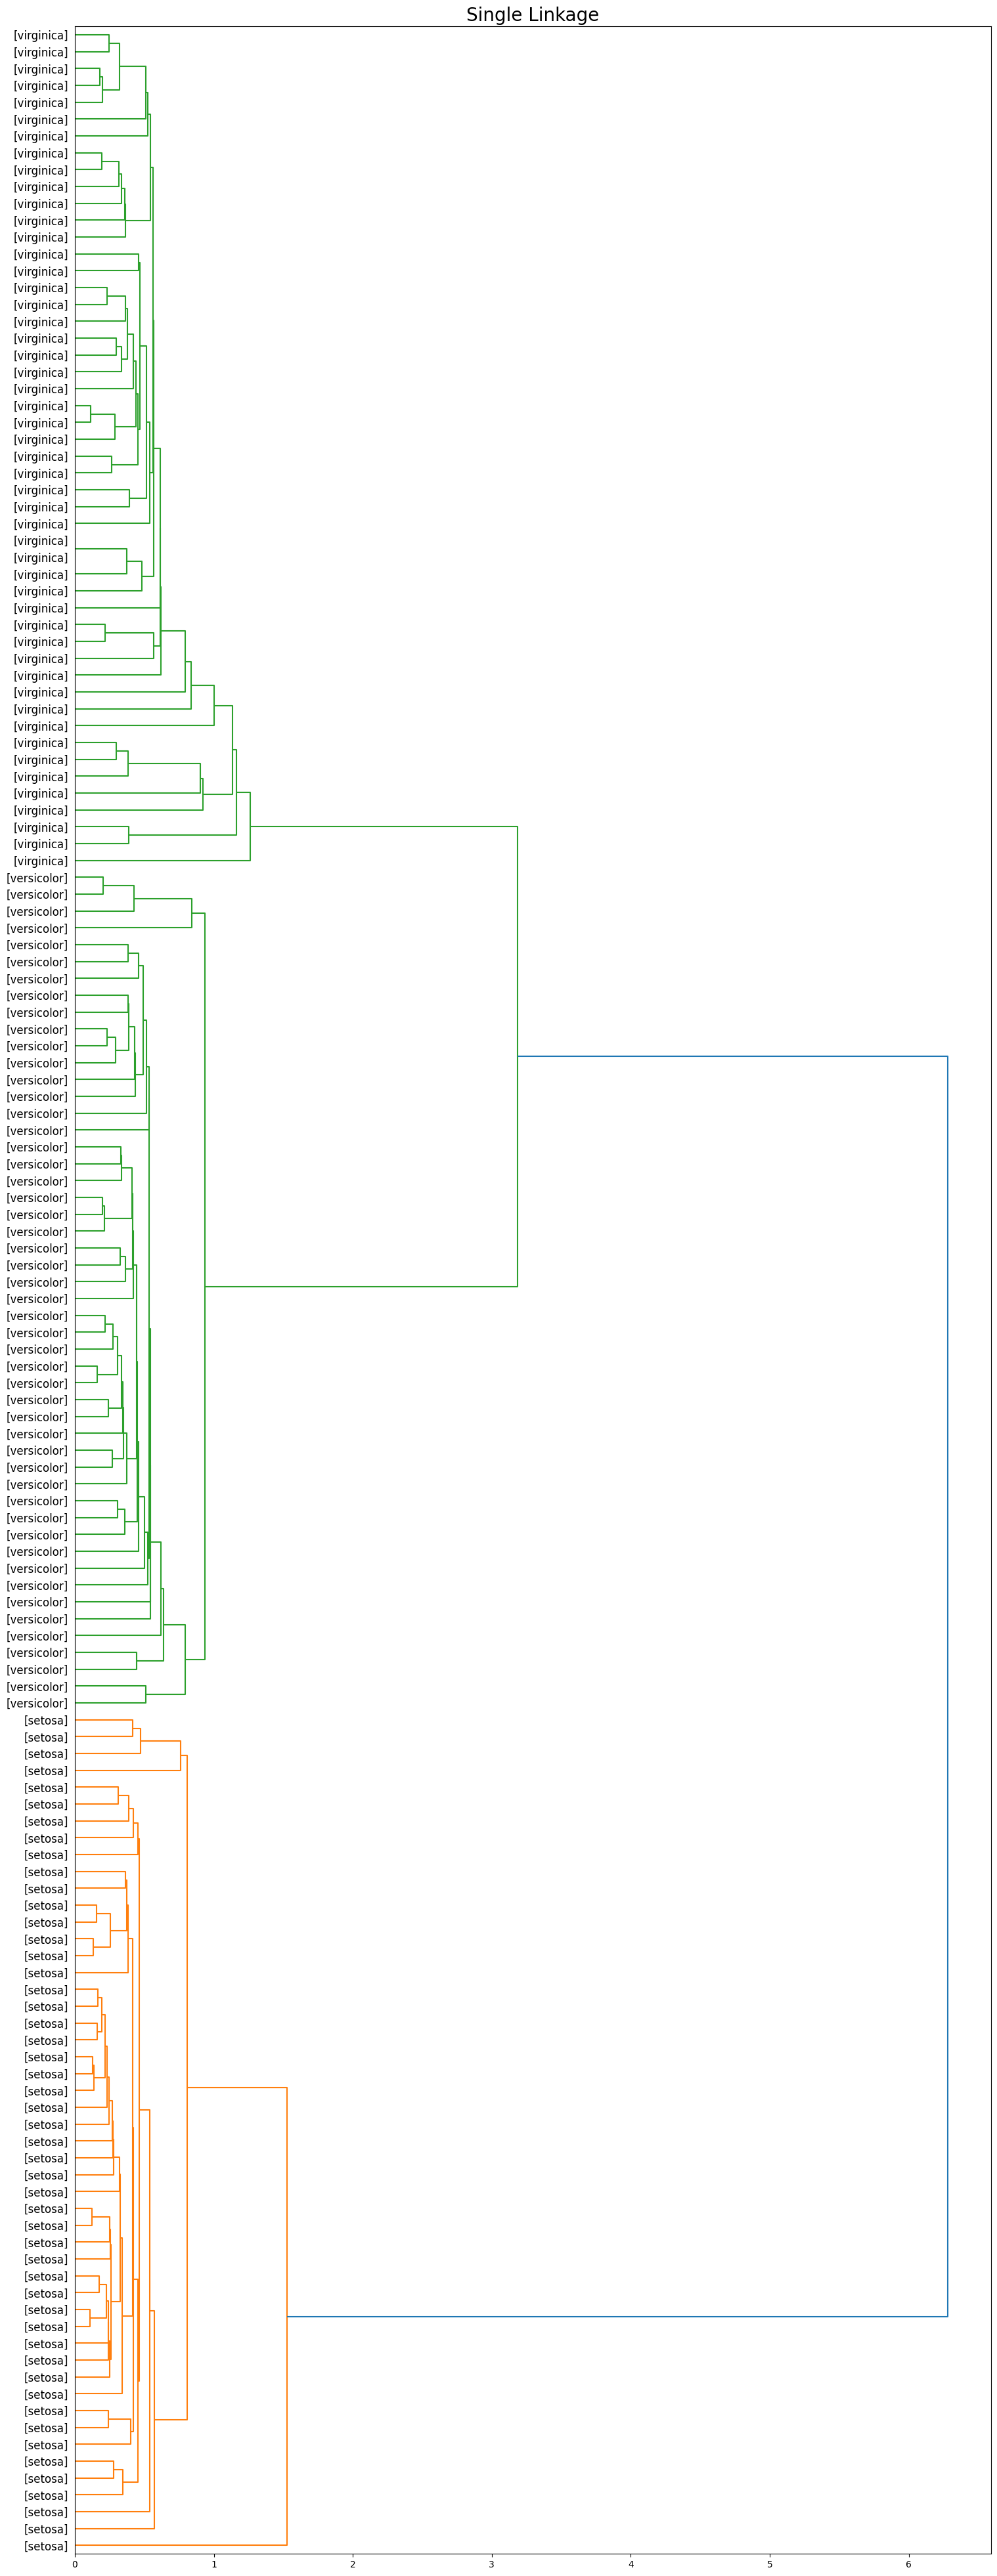

In [ ]:
# Menentukan ukuran figure yang akan dibuat
fig = pylab.figure(figsize=(18,50))

# Fungsi untuk memberikan label pada leaf (daun) dendrogram
def llf(id):
    return '[%s]' %(iris.target_names[df['target'][id]])

# Membuat dendrogram
dendro = hierarchy.dendrogram(X, leaf_label_func = llf,
                              leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

# Menambahkan judul pada dendrogram
plt.title('Single Linkage', fontsize=20)

##### Penjelasan *Source Code* :
Digunakan untuk membuat sebuah *figure* dengan ukuran yang telah ditentukan (18x50) menggunakan modul pylab.figure. Fungsi llf digunakan untuk memberikan label pada *leaf* (daun) dendrogram berdasarkan kolom-kolom tertentu dari DataFrame iris.

Selanjutnya, dendrogram dibuat dengan memanggil fungsi hierarchy.dendrogram. Label pada *leaf* diatur menggunakan fungsi llf, dan beberapa parameter seperti leaf_rotation, leaf_font_size, dan orientation digunakan untuk penataan visual. Dalam hal ini, orientasi dendrogram diatur ke kanan.

Terakhir, sebuah judul ('Single Linkage') ditambahkan pada dendrogram menggunakan plt.title. Judul ini memberikan informasi tentang metode *linkage* yang digunakan dalam pembentukan dendrogram.

Text(0.5, 1.0, 'Average Linkage')

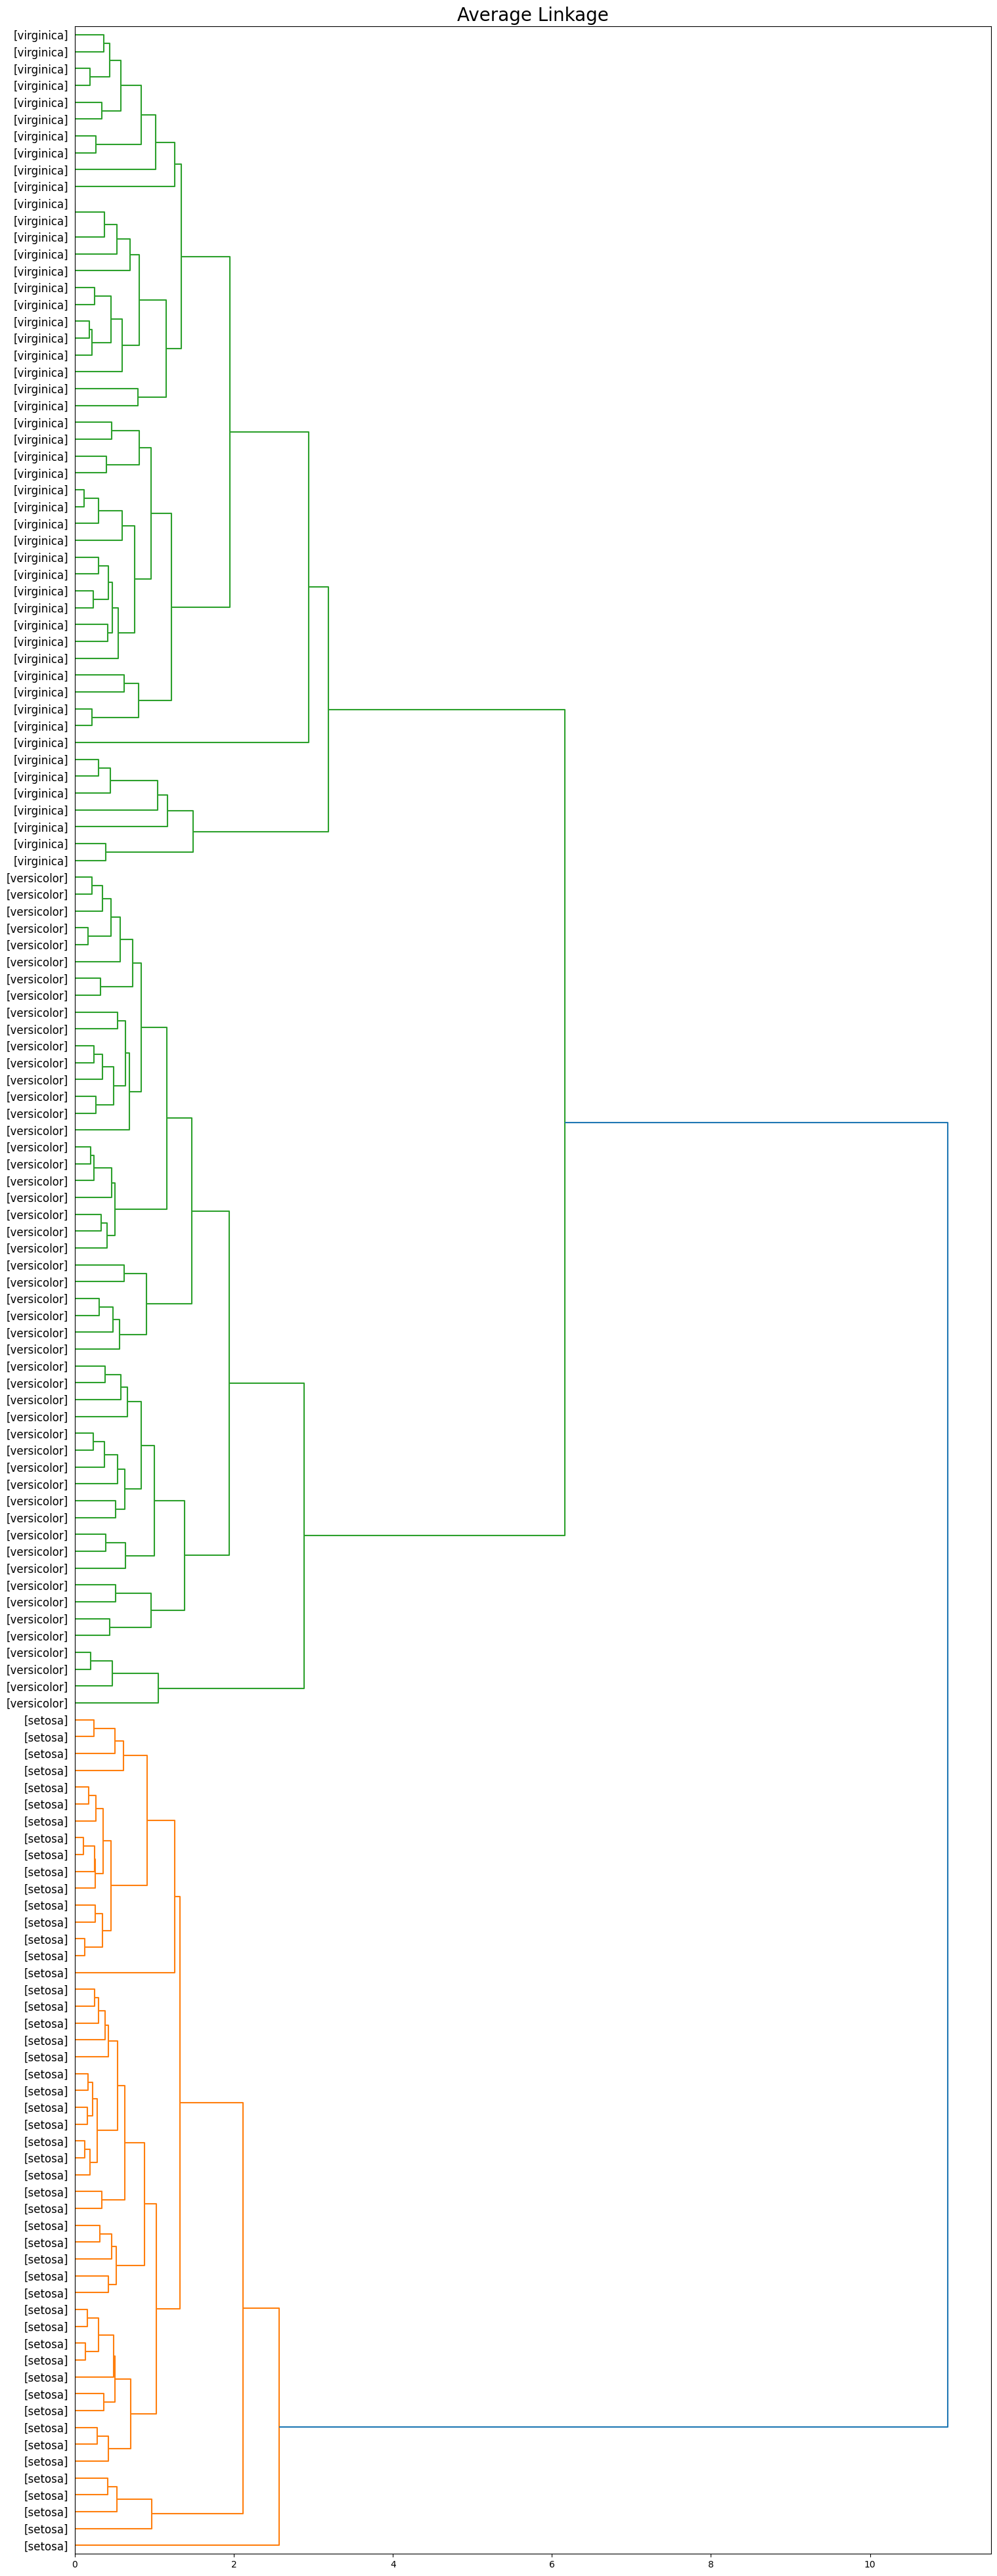

In [ ]:
# Menentukan ukuran figure yang akan dibuat
fig = pylab.figure(figsize=(18,50))

# Fungsi untuk memberikan label pada leaf (daun) dendrogram
def llf(id):
    return '[%s]' %(iris.target_names[df['target'][id]])

# Membuat dendrogram
dendro = hierarchy.dendrogram(Y, leaf_label_func = llf,
                              leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

# Menambahkan judul pada dendrogram
plt.title('Average Linkage', fontsize=20)

##### Penjelasan *Source Code* :
Digunakan untuk membuat sebuah *figure* dengan ukuran yang telah ditentukan (18x50) menggunakan modul pylab.figure. Fungsi llf digunakan untuk memberikan label pada *leaf* (daun) dendrogram berdasarkan kolom-kolom tertentu dari DataFrame iris.

Selanjutnya, dendrogram dibuat dengan memanggil fungsi hierarchy.dendrogram. Label pada *leaf* diatur menggunakan fungsi llf, dan beberapa parameter seperti leaf_rotation, leaf_font_size, dan orientation digunakan untuk penataan visual. Dalam hal ini, orientasi dendrogram diatur ke kanan.

Terakhir, sebuah judul ('Average Linkage') ditambahkan pada dendrogram menggunakan plt.title. Judul ini memberikan informasi tentang metode *linkage* yang digunakan dalam pembentukan dendrogram.

Text(0.5, 1.0, 'Complete Linkage')

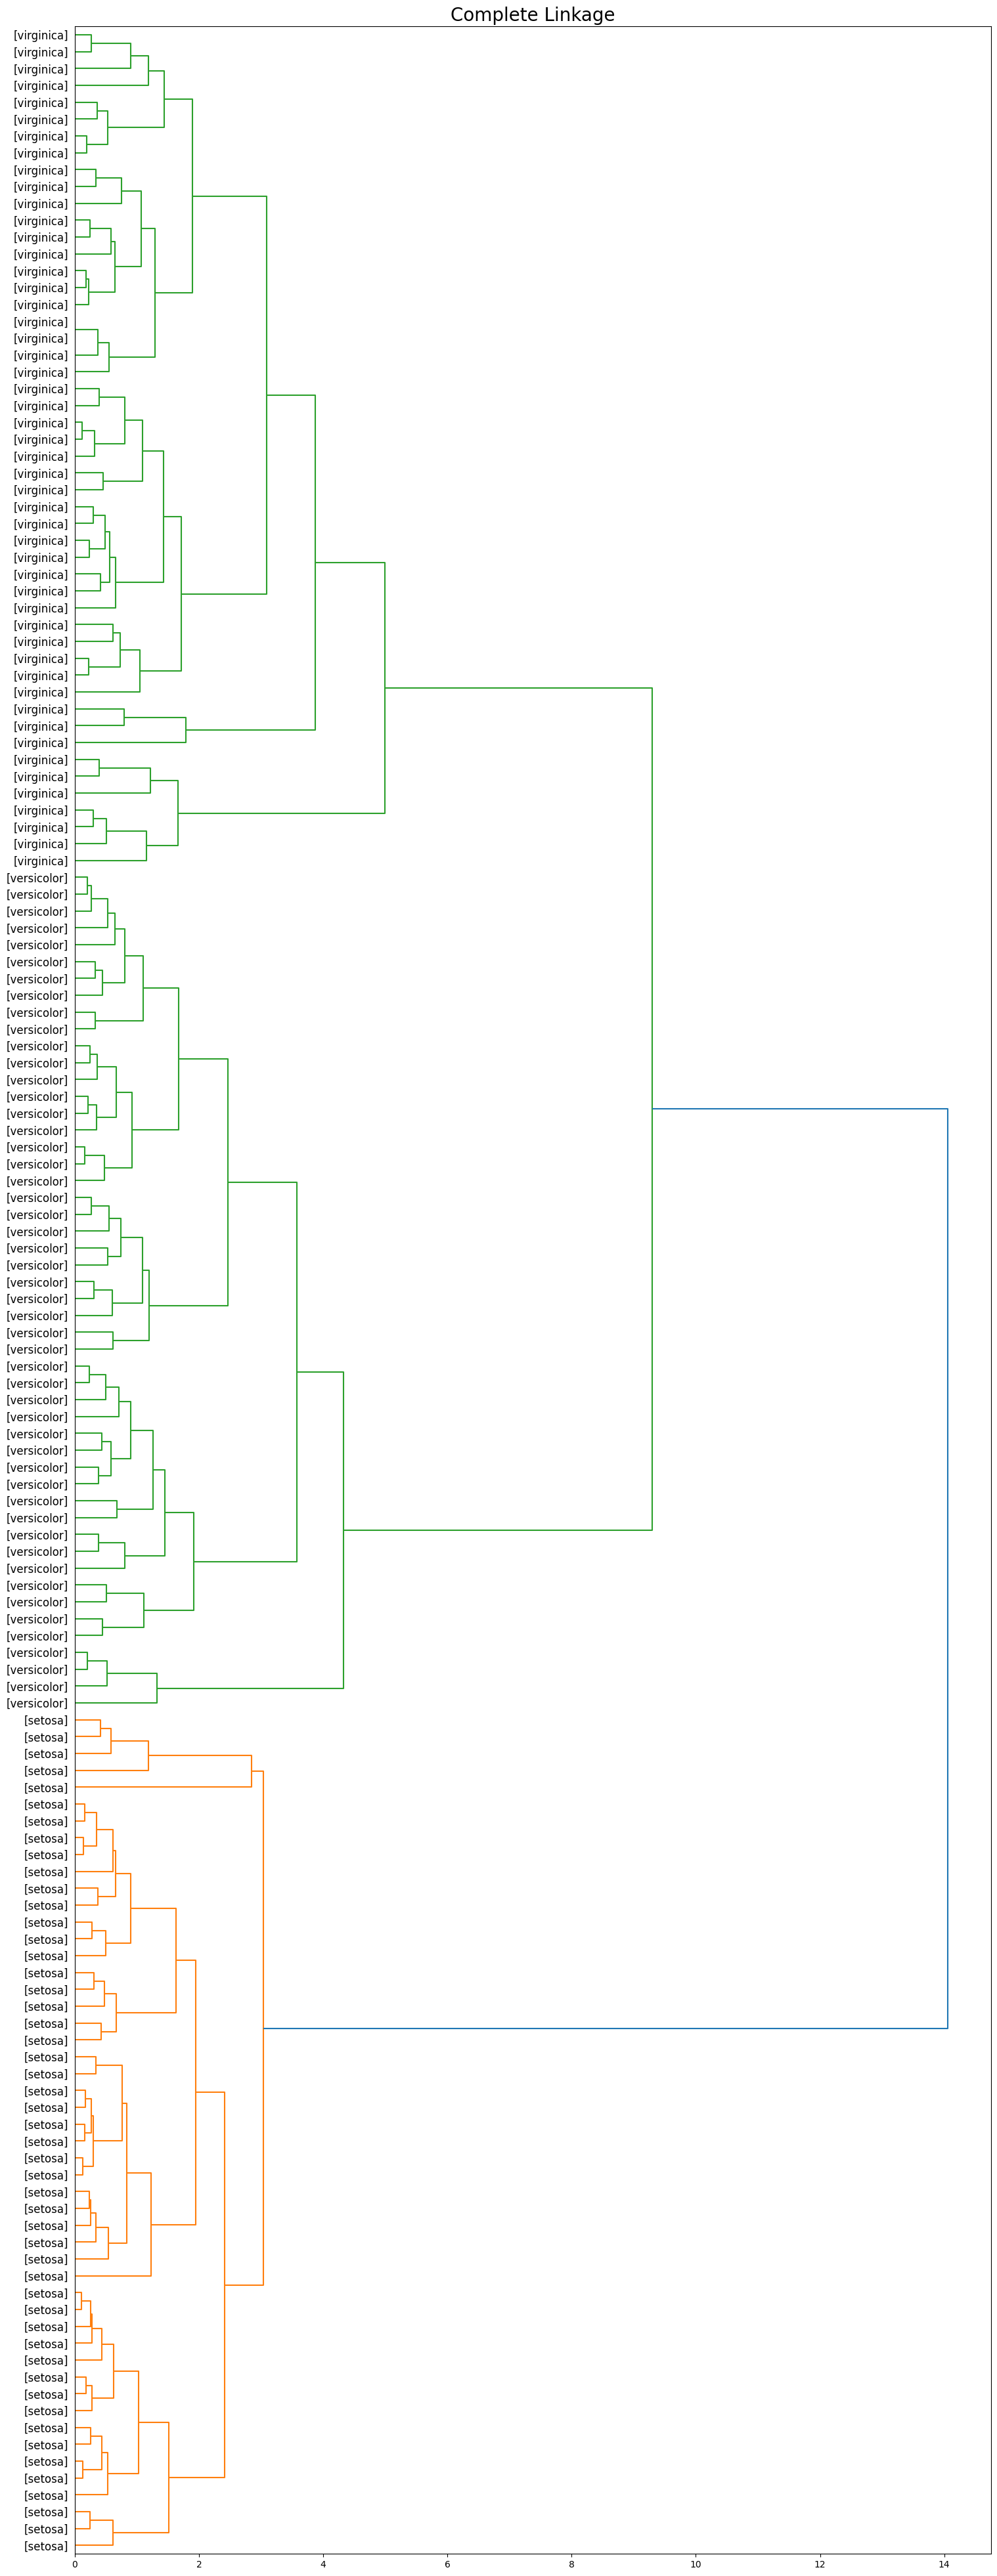

In [ ]:
# Menentukan ukuran figure yang akan dibuat
fig = pylab.figure(figsize=(18,50))

# Fungsi untuk memberikan label pada leaf (daun) dendrogram
def llf(id):
    return '[%s]' %(iris.target_names[df['target'][id]])

# Membuat dendrogram
dendro = hierarchy.dendrogram(Z, leaf_label_func = llf,
                              leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

# Menambahkan judul pada dendrogram
plt.title('Complete Linkage', fontsize=20)

##### Penjelasan *Source Code* :
Digunakan untuk membuat sebuah *figure* dengan ukuran yang telah ditentukan (18x50) menggunakan modul pylab.figure. Fungsi llf digunakan untuk memberikan label pada *leaf* (daun) dendrogram berdasarkan kolom-kolom tertentu dari DataFrame iris.

Selanjutnya, dendrogram dibuat dengan memanggil fungsi hierarchy.dendrogram. Label pada *leaf* diatur menggunakan fungsi llf, dan beberapa parameter seperti leaf_rotation, leaf_font_size, dan orientation digunakan untuk penataan visual. Dalam hal ini, orientasi dendrogram diatur ke kanan.

Terakhir, sebuah judul ('Complete Linkage') ditambahkan pada dendrogram menggunakan plt.title. Judul ini memberikan informasi tentang metode *linkage* yang digunakan dalam pembentukan dendrogram.

###Soal 3B - Menggunakan Scikit-learn

In [ ]:
# Membuat objek dari kelas AgglomerativeClustering
agglomsingle = AgglomerativeClustering(n_clusters =3,linkage ='single')

# Melakukan clustering
agglomsingle.fit(feature_mtx)
agglomsingle.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

##### Penjelasan *Source Code* :
Digunakan untuk membentuk objek kelas AgglomerativeClustering dengan metode *Single Linkage* dan menentukan jumlah *cluster* sebanyak 3 pada matriks fitur (feature_mtx). Setelahnya, objek tersebut dilatih untuk melakukan *clustering* pada data melalui metode fit, dan label-label *cluster* yang diberikan oleh model dapat diakses melalui atribut labels_ pada objek "agglomsingle". Langkah-langkah ini memberikan informasi tentang keanggotaan setiap data dalam *cluster* yang terbentuk berdasarkan metode *Single Linkage*.

In [ ]:
# Membuat objek dari kelas AgglomerativeClustering
agglomaverage = AgglomerativeClustering(n_clusters = 3, linkage = 'average')

# Melakukan clustering
agglomaverage.fit(feature_mtx)
agglomaverage.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

##### Penjelasan *Source Code* :
Digunakan untuk membentuk objek kelas AgglomerativeClustering dengan metode *Average Linkage* dan menentukan jumlah *cluster* sebanyak 3 pada matriks fitur (feature_mtx). Setelahnya, objek tersebut dilatih untuk melakukan *clustering* pada data melalui metode fit, dan label-label *cluster* yang diberikan oleh model dapat diakses melalui atribut labels_ pada objek "agglomaverage". Langkah-langkah ini memberikan informasi tentang keanggotaan setiap data dalam *cluster* yang terbentuk berdasarkan metode *Average Linkage*.

In [ ]:
# Membuat objek dari kelas AgglomerativeClustering
agglomcomplete = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')

# Melakukan clustering
agglomcomplete.fit(feature_mtx)
agglomcomplete.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

##### Penjelasan *Source Code* :
Digunakan untuk membentuk objek kelas AgglomerativeClustering dengan metode *Complete Linkage* dan menentukan jumlah *cluster* sebanyak 3 pada matriks fitur (feature_mtx). Setelahnya, objek tersebut dilatih untuk melakukan *clustering* pada data melalui metode fit, dan label-label *cluster* yang diberikan oleh model dapat diakses melalui atribut labels_ pada objek "agglomcomplete". Langkah-langkah ini memberikan informasi tentang keanggotaan setiap data dalam *cluster* yang terbentuk berdasarkan metode *Complete Linkage*.

In [ ]:
single = df.copy(deep=True)
average = df.copy(deep=True)
complete = df.copy(deep=True)

In [ ]:
# Menambahkan kolom baru bernama 'cluster_' ke dalam DataFrame single
single['cluster_'] = agglomsingle.labels_

# Menampilkan lima baris pertama
single.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster_
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [ ]:
# Menambahkan kolom baru bernama 'cluster_' ke dalam DataFrame average
average['cluster_'] = agglomaverage.labels_

# Menampilkan lima baris pertama
average.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster_
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [ ]:
# Menambahkan kolom baru bernama 'cluster_' ke dalam DataFrame average
complete['cluster_'] = agglomcomplete.labels_

# Menampilkan lima baris pertama
complete.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster_
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [ ]:
# Menghitung tipe di setiap cluster
single.groupby(['cluster_','target'])['cluster_'].count()

cluster_  target
0         2         50
1         0         50
2         1         50
Name: cluster_, dtype: int64

In [ ]:
# Menghitung tipe di setiap cluster
average.groupby(['cluster_','target'])['cluster_'].count()

cluster_  target
0         2         50
1         0         50
2         1         50
Name: cluster_, dtype: int64

In [ ]:
# Menghitung tipe di setiap cluster
complete.groupby(['cluster_','target'])['cluster_'].count()

cluster_  target
0         0         50
1         1         50
          2         20
2         2         30
Name: cluster_, dtype: int64

In [ ]:
# Karakteristik masing-masing cluster
single_iris = single.groupby(['cluster_','target'])['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'].mean()
single_iris

<ipython-input-152-0bc2f03cb55e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  single_iris = single.groupby(['cluster_','target'])['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'].mean()


,,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster_,target,,,,
0,2,6.588,2.974,5.552,2.026
1,0,5.006,3.428,1.462,0.246
2,1,5.936,2.770,4.260,1.326


In [ ]:
# Karakteristik masing-masing cluster
average_iris = average.groupby(['cluster_','target'])['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'].mean()
average_iris

<ipython-input-153-e01ba843b701>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_iris = average.groupby(['cluster_','target'])['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'].mean()


,,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster_,target,,,,
0,2,6.588,2.974,5.552,2.026
1,0,5.006,3.428,1.462,0.246
2,1,5.936,2.770,4.260,1.326


In [ ]:
# Karakteristik masing-masing cluster
complete_iris = complete.groupby(['cluster_','target'])['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'].mean()
complete_iris

<ipython-input-154-75dda7c770fd>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  complete_iris = complete.groupby(['cluster_','target'])['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'].mean()


sepal length (cm)  sepal width (cm)  petal length (cm)  \
cluster_ target                                                           
0        0                5.006000             3.428           1.462000   
1        1                5.936000             2.770           4.260000   
         2                6.055000             2.740           5.130000   
2        2                6.943333             3.130           5.833333   

                 petal width (cm)  
cluster_ target                    
0        0               0.246000  
1        1               1.326000  
         2               1.815000  
2        2               2.166667

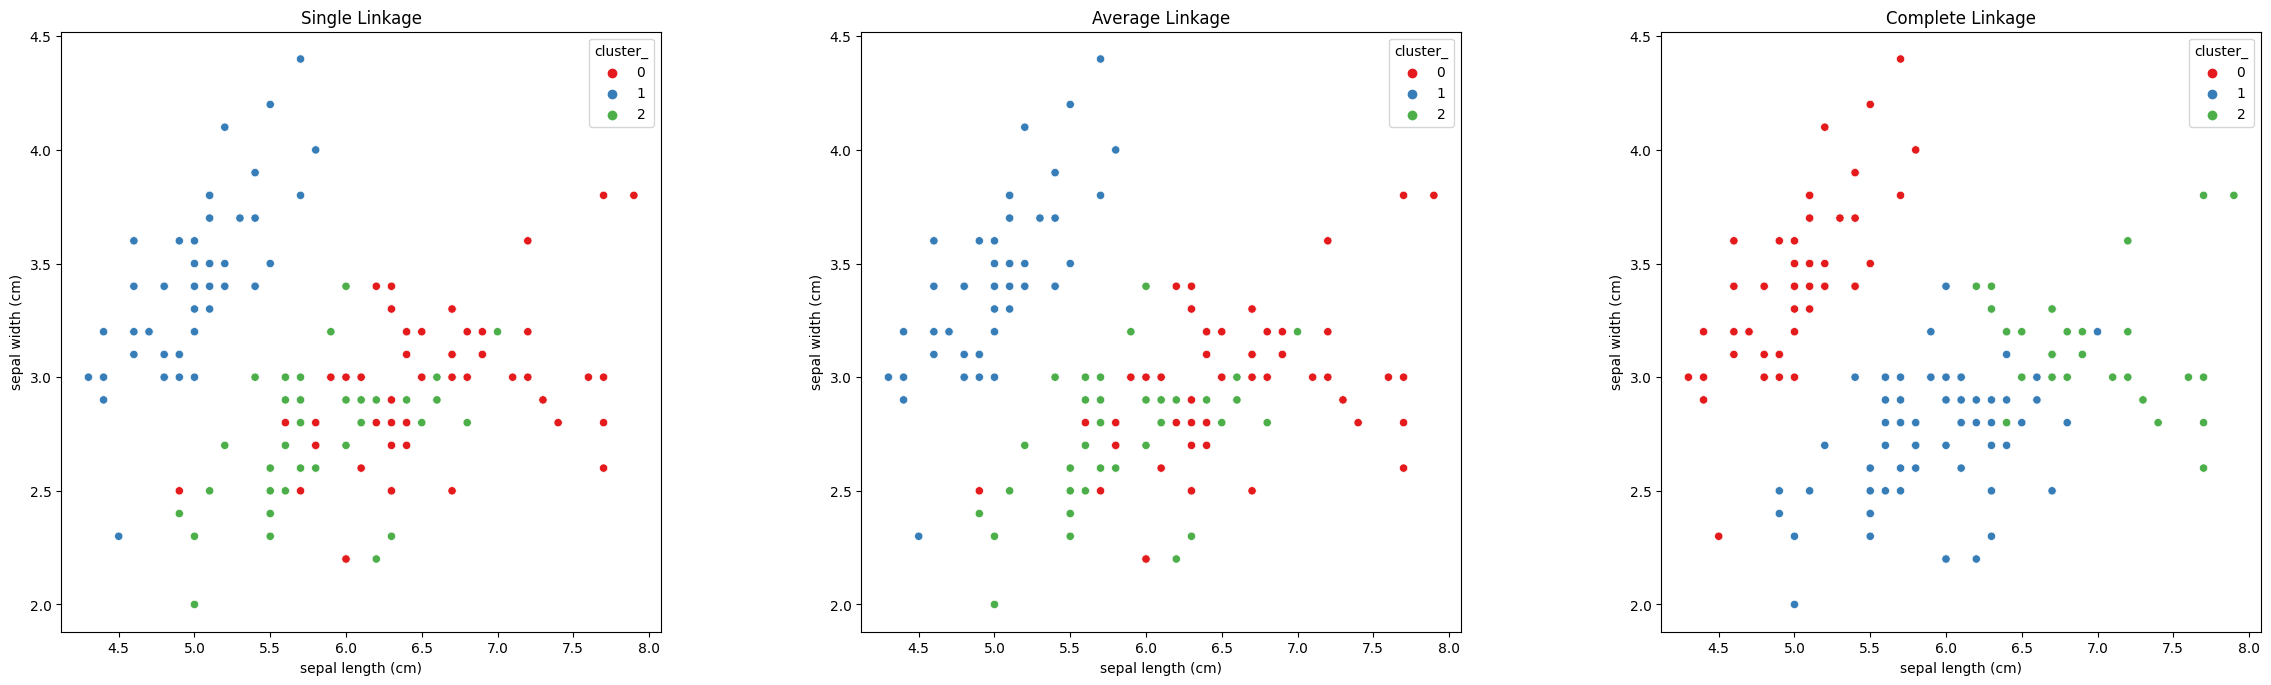

In [ ]:
import seaborn as sns

# Membuat objek gambar (figure) dengan ukuran 16x10.
fig = plt.figure(figsize=(20,10))

# Single Linkage Dendogram
ax1 = fig.add_axes([0.1,0.1,0.3,0.6])
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)',hue='cluster_',data=single,ax=ax1,palette='Set1')
ax1.set_title('Single Linkage')

# Average Linkage Dendogram
ax2 = fig.add_axes([0.5,0.1,0.3,0.6])
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)',hue='cluster_',data=average,ax=ax2,palette='Set1')
ax2.set_title('Average Linkage')

# Complete Linkage Dendogram
ax3 = fig.add_axes([0.9,0.1,0.3,0.6])
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)',hue='cluster_',data=complete,ax=ax3,palette='Set1')
ax3.set_title('Complete Linkage')

plt.show()

##### Penjelasan Ketiga Gambar :
Ketiga gambar tersebut merupakan visualisasi dendrogram untuk setiap jenis *linkage* yang disusun dalam satu baris

Dendrogram kiri untuk *Single Linkage*, tengah untuk *Average Linkage*, dan kanan untuk *Complete Linkage*. Adapun fitur sepal_length diatur sebagai sumbu X dan sepal_width diatur sebagai sumbu Y.

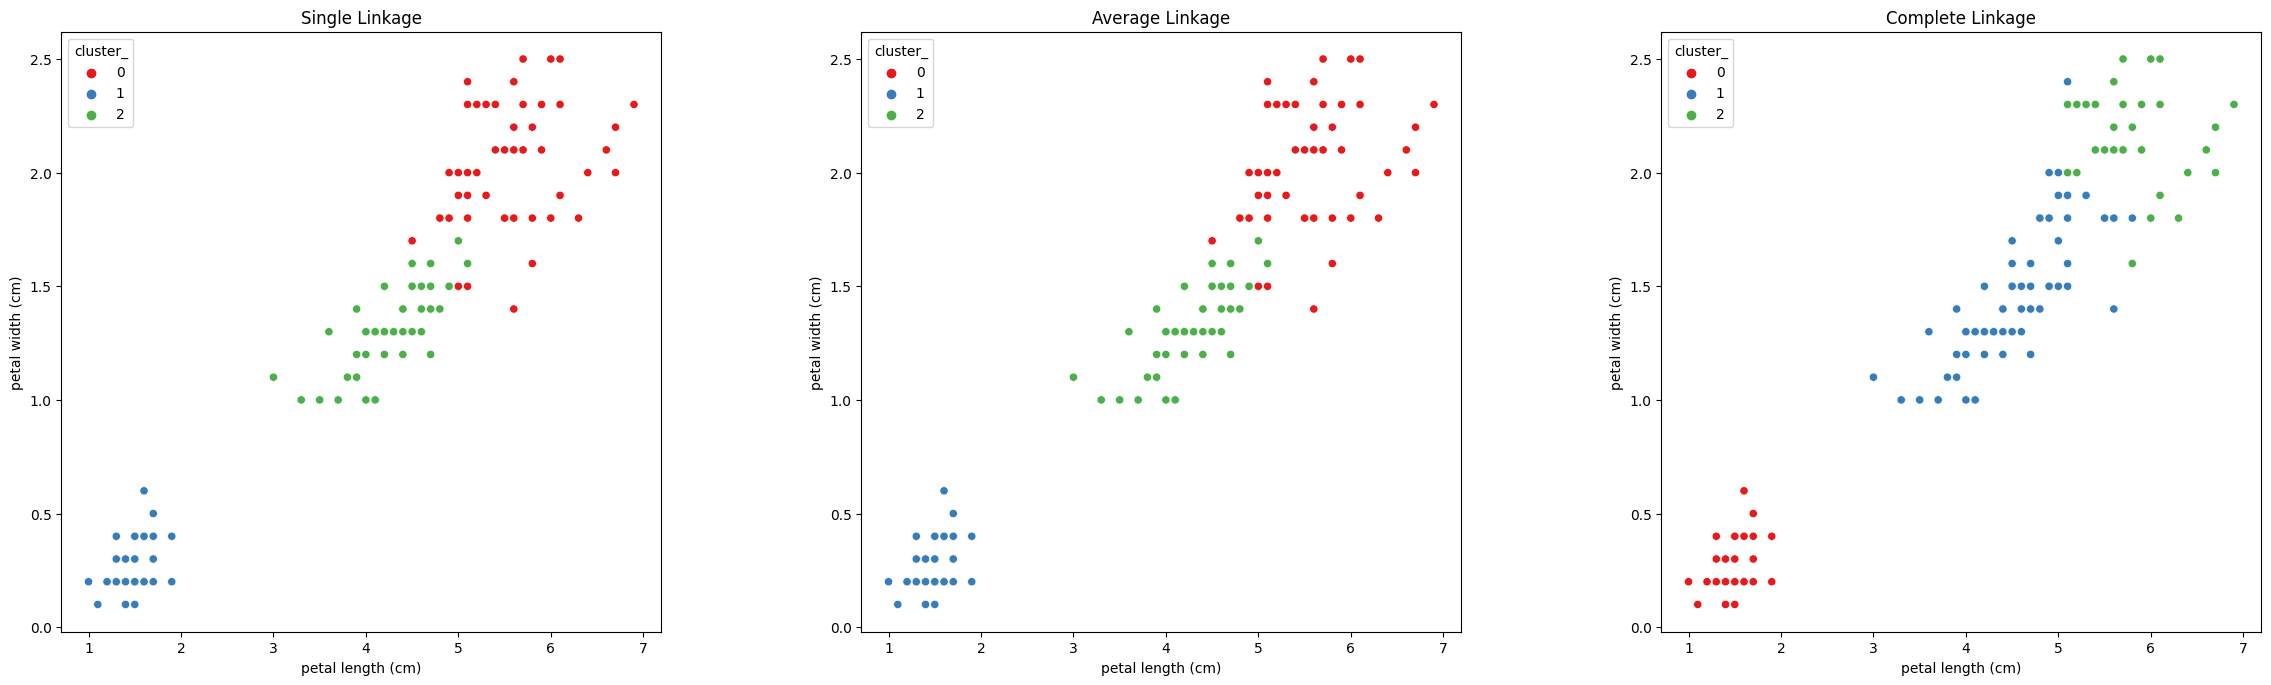

In [ ]:
import seaborn as sns

# Membuat objek gambar (figure) dengan ukuran 16x10.
fig = plt.figure(figsize=(20,10))

# Single Linkage Dendogram
ax1 = fig.add_axes([0.1,0.1,0.3,0.6])
sns.scatterplot(x='petal length (cm)',y='petal width (cm)',hue='cluster_',data=single,ax=ax1,palette='Set1')
ax1.set_title('Single Linkage')

# Average Linkage Dendogram
ax2 = fig.add_axes([0.5,0.1,0.3,0.6])
sns.scatterplot(x='petal length (cm)',y='petal width (cm)',hue='cluster_',data=average,ax=ax2,palette='Set1')
ax2.set_title('Average Linkage')

# Complete Linkage Dendogram
ax3 = fig.add_axes([0.9,0.1,0.3,0.6])
sns.scatterplot(x='petal length (cm)',y='petal width (cm)',hue='cluster_',data=complete,ax=ax3,palette='Set1')
ax3.set_title('Complete Linkage')

plt.show()

##### Penjelasan Ketiga Gambar :
Ketiga gambar tersebut merupakan visualisasi dendrogram untuk setiap jenis *linkage* yang disusun dalam satu baris

Dendrogram kiri untuk *Single Linkage*, tengah untuk *Average Linkage*, dan kanan untuk *Complete Linkage*. Adapun fitur petal_length diatur sebagai sumbu X dan petal_width diatur sebagai sumbu Y.

##### Perbedaan :
Dengan menggunakan metode *clustering* dari Scipy atau Scikit-learn, hasil *clustering* yang didapatkan memang cenderung serupa, tapi ada perbedaan dalam proses dan kebutuhan komputasi di antara keduanya. Secara spesifik, Scikit-learn membutuhkan lebih banyak langkah, seperti menghitung jarak, menganalisis jumlah kasus, dan karakteristik *cluster* untuk menghasilkan dendrogram atau plot akhir yang lebih jelas.

Ketika kita melihat hasil *clustering* dengan metode *Single Linkage* dan *Average Linkage*, distribusi jumlah data di setiap *cluster* sama, yaitu 50 entri data untuk setiap *cluster*. Tetapi, ketika menggunakan metode *Complete Linkage*, terjadi perbedaan di mana *cluster* 0 punya 50 data, *cluster* 1 punya 70 data, dan *cluster* 2 punya 30 data. Ini mengakibatkan perbedaan dalam struktur dendrogram hasil *Complete Linkage* dibandingkan dengan *Single Linkage* dan *Average Linkage*.

Ketika kita gambarkan dendrogram dengan fitur petal_length dan petal_width, hasil *clustering* dari metode *Single Linkage* dan *Average Linkage* menunjukkan struktur yang mirip. Pada struktur ini, data di sebelah kiri dikategorikan sebagai *cluster* 1, data di tengah sebagai *cluster* 2, dan data di sebelah kanan sebagai *cluster* 0. Namun, pada metode *Complete Linkage*, data di sebelah kiri termasuk *cluster* 0, data di tengah termasuk *cluster* 1, dan data di sebelah kanan termasuk *cluster* 2. Perbedaan ini menunjukkan variasi dalam hasil *clustering* antara metode-metode tersebut.

### Link Collab : https://colab.research.google.com/drive/1e7pXek1AUMzKMVGpjKOPfvti8b8DvCJ-?usp=sharing